# Offene Fragen:
daten / kai:
* Inputfield: wie können sie in falseAttempts nur einen drinne haben, aber evaluation auf false. manche false erst ab 2 abgaben, die dann schon ab einem?
* ab wann gibt es revisions?

machen
* vllt sollte ich die eine aufgabe ganz ditchen, die macht sonst auch durations etc kaputt
* min und max label ausgeben bei slider

python:
* groupby
* figure and axes

In [82]:
import json
import math
import scipy
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns
from numpy.random import randn
from statistics import mode
%matplotlib inline

In [2]:
scipy.__version__

'1.4.1'

# Load CSVs and check DFs

In [83]:
df = pd.read_pickle('df.pkl') #, index_col=0
pupil_performance_df = pd.read_pickle('pupil_performance.pkl')
chat_df = pd.read_pickle("chat.pkl")

In [84]:
print(len(pupil_performance_df))
pupil_performance_df.head()

40


,pupilId,nr_tasks_per_pupil,total_duration in minutes,average duration per task in minutes
0,bniRycMi5bwrXjvGy,67,71.083333,1.060945
1,sqBXKssFvS8pFYAMv,67,66.966667,0.999502
2,Kd6FuRsrq6QvPrkKp,6,37.383333,6.230556
3,6bBwnX2mwAp2NAwNR,36,116.100000,3.225000
4,ZTvPk2i77LDC8pFmu,67,60.466667,0.902488


In [85]:
print(len(df))
df.head()

1621


,pupilId,classId,taskId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,...,answers,minLabel,maxLabel,hints,sampleSolution,numberFalseAttempts,number words in answer,rating_content,rating_format,rating_creativity
0,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-1-1,AI-1-v2,40,92,True,surveySlider,NaN,NaN,...,NaN,Gar nicht,Sehr gut,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,AI-1-v2,119,"Künstliche Intelligenz ist ein Algorithmus, de...",True,freetext,correct,NaN,...,NaN,NaN,NaN,NaN,Die Schülerinnen und Schüler (SuS) sollen besc...,NaN,18.0,3.0,5.0,4.0
2,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-2-1,AI-1-v2,268,"[0, 0, 1, 0, 0]",True,survey,NaN,NaN,...,"[{'de': '0', 'en-US': '0'}, {'de': '1-2', 'en-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-2-v2-1-1,AI-2-v2,94,"[True, True, False, True]",True,multipleChoice,correct,NaN,...,[{'de': 'Der Newsfeed eines Social Network nut...,NaN,NaN,"Denk an die Beispiele, die wir uns am Anfang a...","[True, True, False, True]",NaN,NaN,NaN,NaN,NaN
4,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-3-v2-1-1,AI-3-v2,43,"[False, False, False]",True,multipleChoice,correct,NaN,...,"[{'de': 'Die Anwendung, die den Facebook-Feed ...",NaN,NaN,"Kann überhaupt eine dieser Anwendungen etwas, ...","[False, False, False]",NaN,NaN,NaN,NaN,NaN


# Analyse Pupil Performance

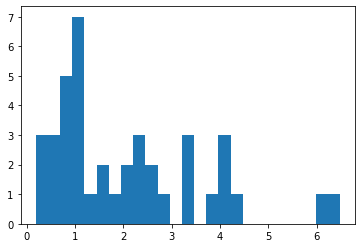

In [86]:
plt.hist(pupil_performance_df["average duration per task in minutes"], bins=int(np.max(pupil_performance_df["average duration per task in minutes"])/0.25))
plt.show()

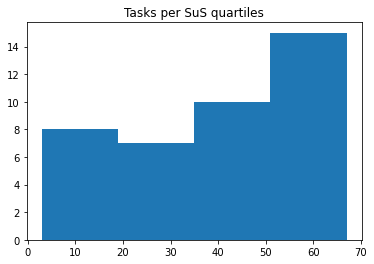

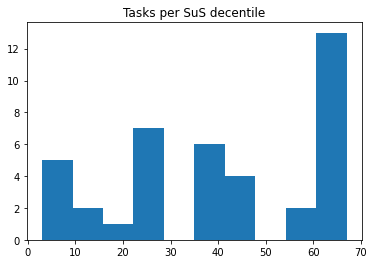

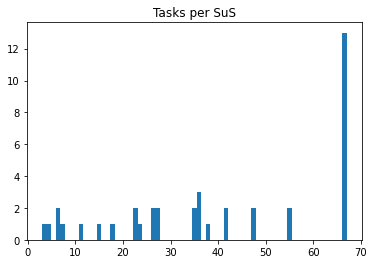

In [87]:
# anzahl tasks per pupil

plt.hist(pupil_performance_df["nr_tasks_per_pupil"], bins=4)
plt.title("Tasks per SuS quartiles")
plt.show()
plt.hist(pupil_performance_df["nr_tasks_per_pupil"], bins=10)
plt.title("Tasks per SuS decentile")
plt.show()
plt.hist(pupil_performance_df["nr_tasks_per_pupil"], bins=np.max(pupil_performance_df["nr_tasks_per_pupil"]))
plt.title("Tasks per SuS")
plt.show()

In [88]:
# Wie viele SuS haben die jeweilige Aufgabe gelöst?
df["taskId"].value_counts()

AI-1-v2-2-1    40
AI-1-v2-1-1    40
AI-1-v2-1-2    40
AI-2-v2-1-1    38
AI-3-v2-1-2    36
               ..
EvalML-1-8     16
EvalML-1-7     16
EvalML-1-5     16
EvalML-1-6     16
EvalML-1-3     16
Name: taskId, Length: 67, dtype: int64

## Fortschritt aller SuS im Paket

Mögliche Erklärung: Kein Präsenzunterricht wegen Corona?
Mögliche Erklärung: Nicht alle Lehrer haben das Paket zuende gespielt


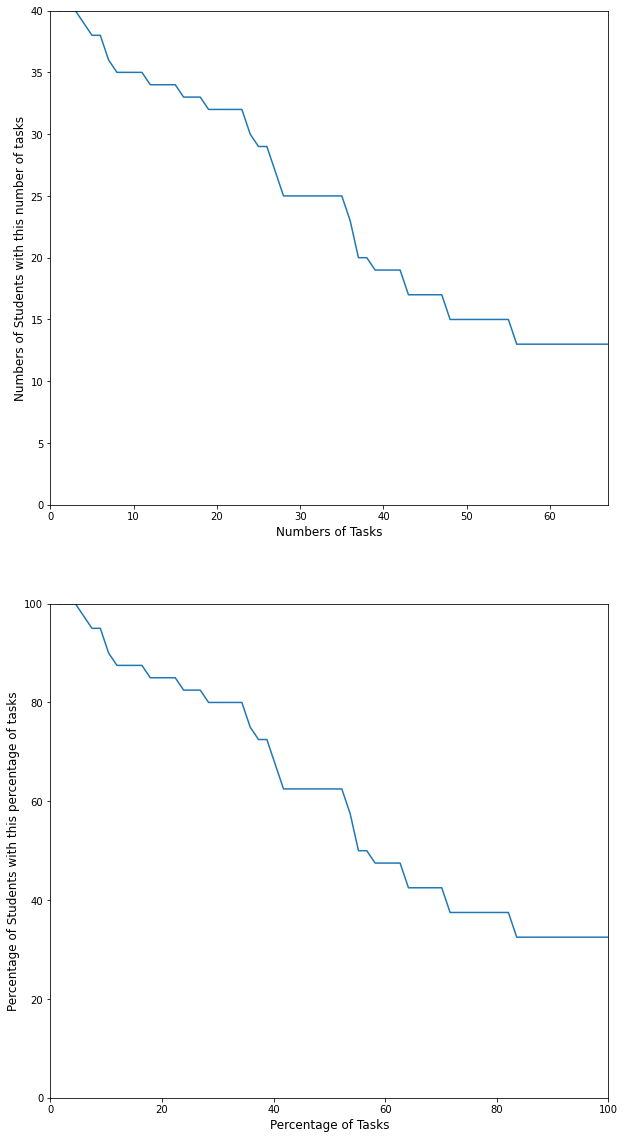

In [89]:
nr_all_tasks = len(df["taskId"].unique())

sorted_nr_tasks_per_pupil = np.sort(pupil_performance_df["nr_tasks_per_pupil"])

# Number of students with number of tasks
number_pupils_with_this_number_of_tasks = []
for i in range(nr_all_tasks):
    at_least_this_number = 0
    for number in sorted_nr_tasks_per_pupil:
        if number >= i+1:
            at_least_this_number += 1
    number_pupils_with_this_number_of_tasks.append(at_least_this_number) #anzahl zahlen mit mehr

# percentage of students with each percentage of tasks
task_percentage = [i * (100/nr_all_tasks) for i in range(1,nr_all_tasks+1)]
pupil_percentages = [i * (100/len(df["pupilId"].unique())) for i in number_pupils_with_this_number_of_tasks]


# PLOTTING
print("Mögliche Erklärung: Kein Präsenzunterricht wegen Corona?")
print("Mögliche Erklärung: Nicht alle Lehrer haben das Paket zuende gespielt")
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,20))

ax1 = plt.subplot(211)
ax1.plot(range(1,nr_all_tasks+1), number_pupils_with_this_number_of_tasks)
ax1.set_xlabel( "Numbers of Tasks" , size = 12 )
ax1.set_ylabel( "Numbers of Students with this number of tasks" , size = 12 )
ax1.set_xlim([0, nr_all_tasks])
ax1.set_ylim([0, len(sorted_nr_tasks_per_pupil)])

ax2 = plt.subplot(212)
ax2.plot(task_percentage, pupil_percentages)
ax2.set_xlabel( "Percentage of Tasks" , size = 12 )
ax2.set_ylabel( "Percentage of Students with this percentage of tasks" , size = 12 )
ax2.set_xlim([0, 100])
ax2.set_ylim([0, 100])

plt.show()

# Itemanalyse
## Surveyslider

TASK   AI-1-v2-1-1: Wie gut weißt du schon, was KI ist?
State
min: 5
max: 100
median: 71.5
mean: 69.0
std: 20.971409108593537


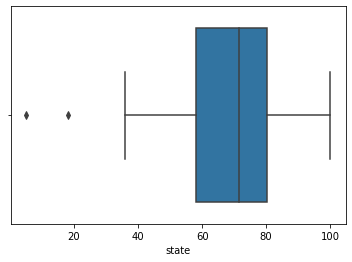

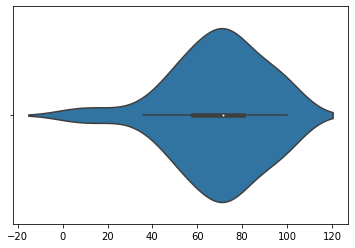

Ausreißer:
                pupilId       taskId state  \
904   vNMvj2EsvKXvqk3Qw  AI-1-v2-1-1     5   
1554  gDspq39jnffCNv8E2  AI-1-v2-1-1    18   

                                 question  
904   Wie gut weißt du schon, was KI ist?  
1554  Wie gut weißt du schon, was KI ist?  

Durations:


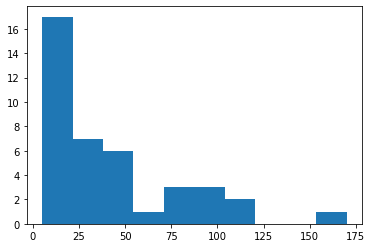

median duration: 26.5
mean duration: 42.225
-------------------------------------------------------------


TASK   AI-4-v2-1-4: Wie gut hast du jetzt verstanden, was KI ist?
State
min: 40
max: 100
median: 86.0
mean: 79.06451612903226
std: 18.819919926933572


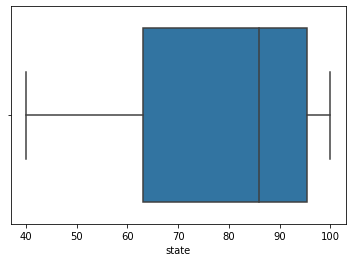

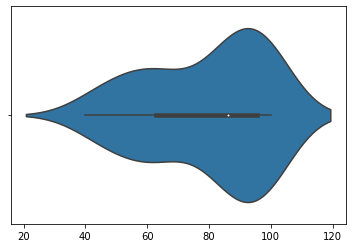

Ausreißer:
                pupilId       taskId state  \
1224  JTE3T8c3SN6ehbrDQ  AI-4-v2-1-4    40   

                                           question  
1224  Wie gut hast du jetzt verstanden, was KI ist?  

Durations:


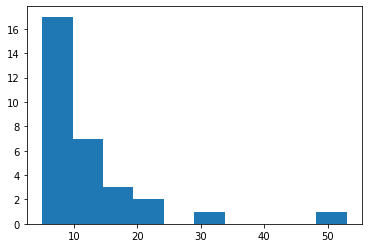

median duration: 8.0
mean duration: 12.580645161290322
-------------------------------------------------------------


TASK   AI-4-v2-1-5: Wie gut hast du den Unterschied zwischen spezifischer und allgemeiner KI verstanden?
State
min: 33
max: 100
median: 88.0
mean: 78.96774193548387
std: 22.712059992318906


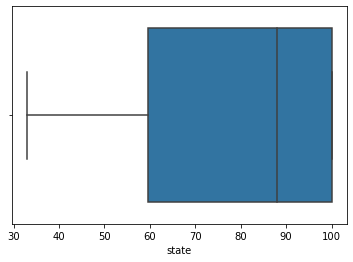

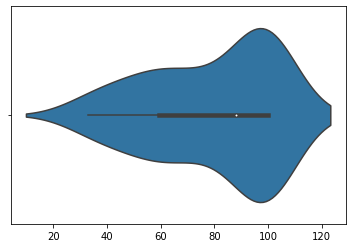

Ausreißer:
               pupilId       taskId state  \
920  Absyuhryq96KZL2Cs  AI-4-v2-1-5    33   

                                              question  
920  Wie gut hast du den Unterschied zwischen spezi...  

Durations:


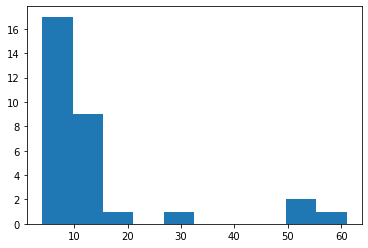

median duration: 8.0
mean duration: 13.935483870967742
-------------------------------------------------------------


TASK   ML-2-1-1: Wie gut weißt du schon, was Maschinelles Lernen ist?
State
min: 47
max: 100
median: 66.0
mean: 69.51724137931035
std: 17.31377902464248


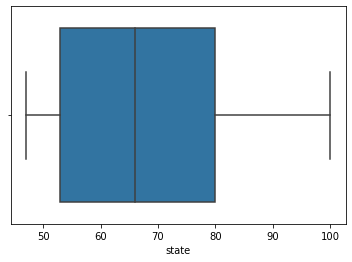

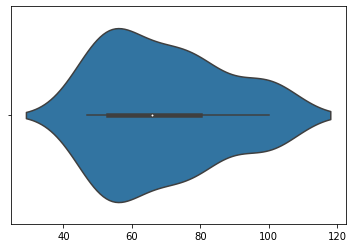

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


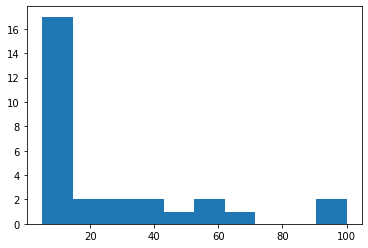

median duration: 10.0
mean duration: 25.24137931034483
-------------------------------------------------------------


TASK   EvalML-1-1: Wie gut hast du verstanden, was KI ist? Sei dabei so ehrlich es geht damit wir diese Inhalte noch verbessern können.
State
min: 31
max: 100
median: 77.5
mean: 72.3125
std: 23.376587512936954


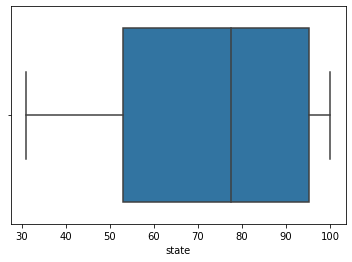

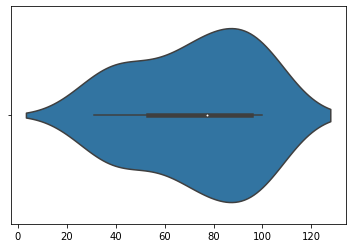

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


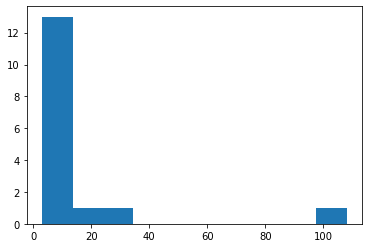

median duration: 10.0
mean duration: 16.9375
-------------------------------------------------------------


TASK   EvalML-1-2: Wie gut hast du den Unterschied zwischen spezifischer und allgemeiner KI verstanden?
State
min: 1
max: 100
median: 87.0
mean: 74.0625
std: 30.27678308126542


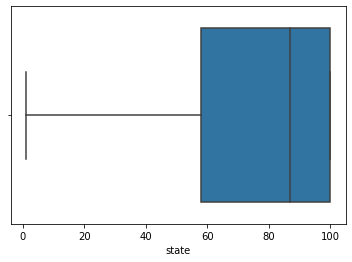

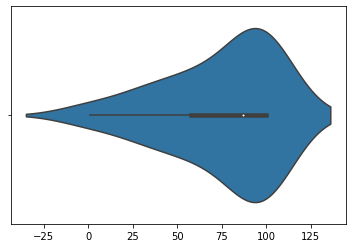

Ausreißer:
                pupilId      taskId state  \
1164  5GPMWTgF29JDyeXoG  EvalML-1-2     1   

                                               question  
1164  Wie gut hast du den Unterschied zwischen spezi...  

Durations:


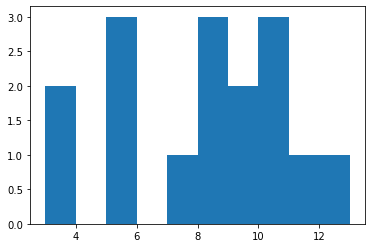

median duration: 8.0
mean duration: 7.75
-------------------------------------------------------------


TASK   EvalML-1-5: Wie gut hast du verstanden, was maschinelles Lernen ist? Sei dabei so ehrlich es geht, damit wir diese Inhalte noch verbessern können.
State
min: 24
max: 100
median: 71.5
mean: 68.625
std: 21.8428334929331


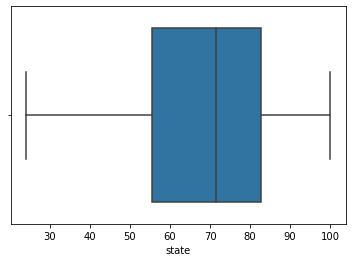

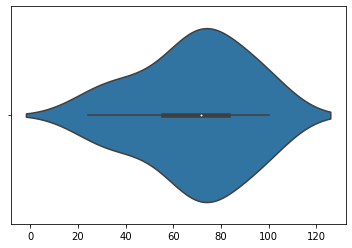

Ausreißer:
                pupilId      taskId state  \
1596  gDspq39jnffCNv8E2  EvalML-1-5    24   

                                               question  
1596  Wie gut hast du verstanden, was maschinelles L...  

Durations:


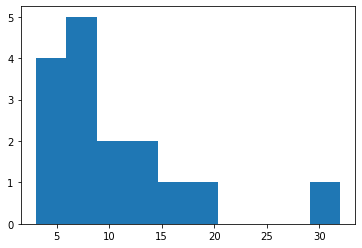

median duration: 7.5
mean duration: 9.875
-------------------------------------------------------------


TASK   EvalML-1-6: Wie sehr hast du das Gefühl, verstanden zu haben, was der Unterschied zwischen überwachtem und unüberwachtem Lernen ist?
State
min: 37
max: 100
median: 73.5
mean: 74.5
std: 20.503048553812675


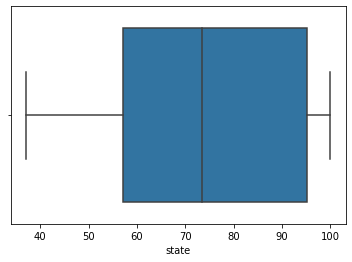

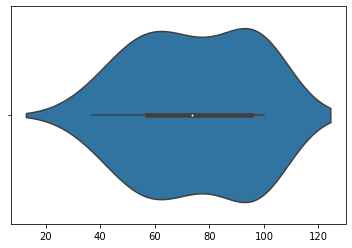

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


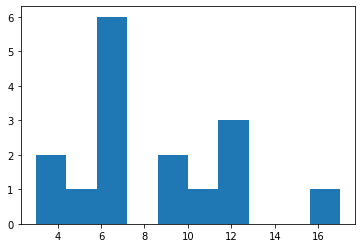

median duration: 7.0
mean duration: 8.375
-------------------------------------------------------------


TASK   Impact-2-1-2: Ich würde gerne in einem Land leben, dass den Alltag aller Bürger mit KI überwacht.
State
min: 1
max: 100
median: 16.5
mean: 21.181818181818183
std: 23.070320097941586


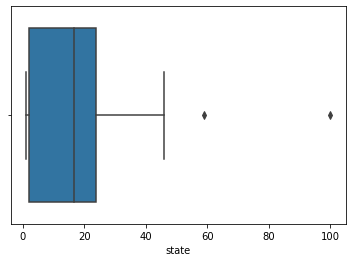

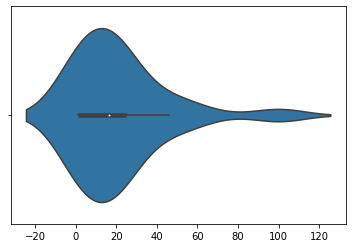

Ausreißer:
                pupilId        taskId state  \
1174  5GPMWTgF29JDyeXoG  Impact-2-1-2   100   

                                               question  
1174  Ich würde gerne in einem Land leben, dass den ...  

Durations:


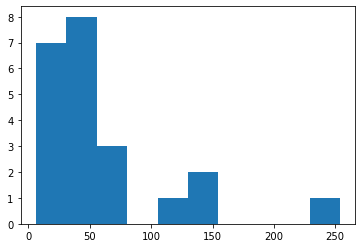

median duration: 33.5
mean duration: 57.72727272727273
-------------------------------------------------------------


TASK   Impact-2-1-3: Die Überwachung des Alltags aller Bürger sehe ich sehr kritisch.
State
min: 15
max: 100
median: 80.5
mean: 78.13636363636364
std: 21.959250389891512


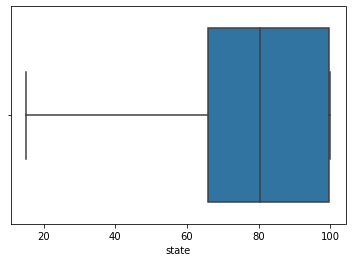

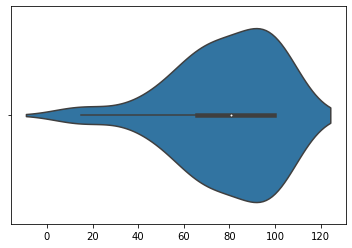

Ausreißer:
                pupilId        taskId state  \
1604  gDspq39jnffCNv8E2  Impact-2-1-3    15   

                                               question  
1604  Die Überwachung des Alltags aller Bürger sehe ...  

Durations:


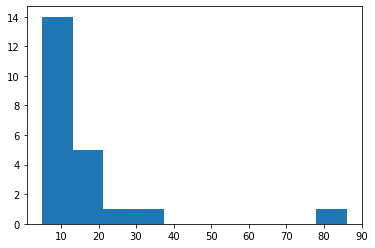

median duration: 11.0
mean duration: 16.40909090909091
-------------------------------------------------------------


TASK   Impact-2-1-4: Mich würde es stören, mittels KI-Technologien überwacht zu werden.
State
min: 15
max: 100
median: 83.0
mean: 77.72727272727273
std: 24.196509549523157


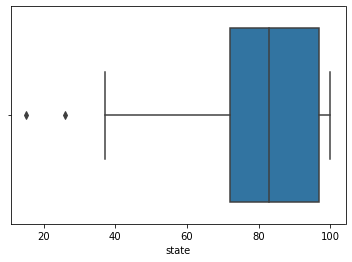

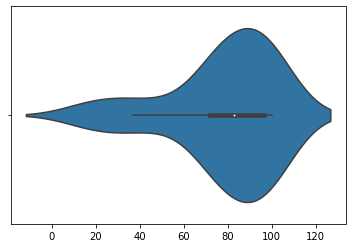

Ausreißer:
                pupilId        taskId state  \
754   3hiSwDCiw9HeyHg7f  Impact-2-1-4    15   
1605  gDspq39jnffCNv8E2  Impact-2-1-4    26   

                                               question  
754   Mich würde es stören, mittels KI-Technologien ...  
1605  Mich würde es stören, mittels KI-Technologien ...  

Durations:


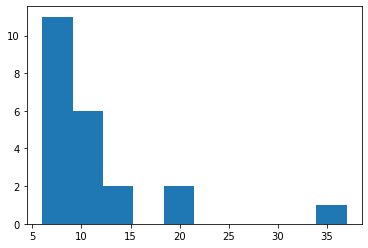

median duration: 9.5
mean duration: 11.5
-------------------------------------------------------------


TASK   Impact-2-1-5: Die Überwachung durch die Regierung bietet viele Vorteile für die Gesellschaft.
State
min: 1
max: 85
median: 39.5
mean: 38.13636363636363
std: 26.55747704087983


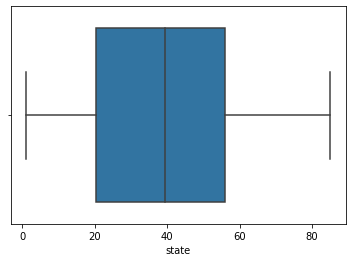

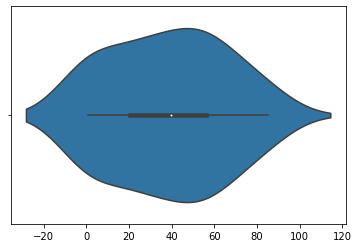

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


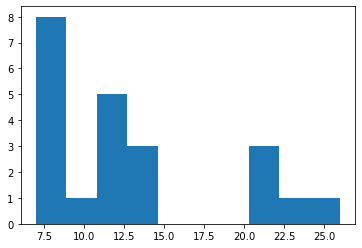

median duration: 11.5
mean duration: 12.772727272727273
-------------------------------------------------------------


TASK   Impact-2-1-6: Ich würde nicht in einem Land leben wollen, dass meinen Alltag überwacht.
State
min: 1
max: 100
median: 84.0
mean: 75.95454545454545
std: 27.715235837363196


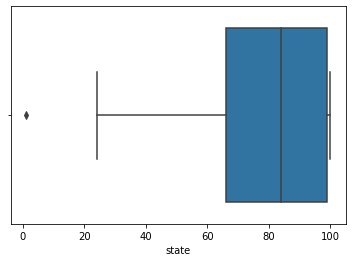

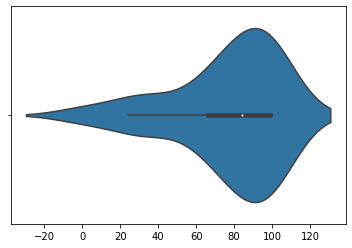

Ausreißer:
                pupilId        taskId state  \
1044  T4iugPHxim5gX8M4i  Impact-2-1-6     1   

                                               question  
1044  Ich würde nicht in einem Land leben wollen, da...  

Durations:


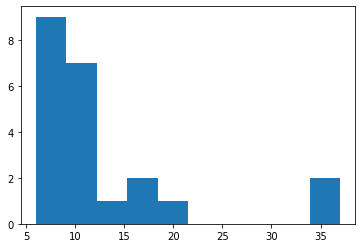

median duration: 10.0
mean duration: 12.772727272727273
-------------------------------------------------------------


TASK   Impact-2-1-7: In einem Land mit Überwachung würde ich mich sehr sicher fühlen.
State
min: 1
max: 83
median: 41.5
mean: 39.81818181818182
std: 26.2481797873445


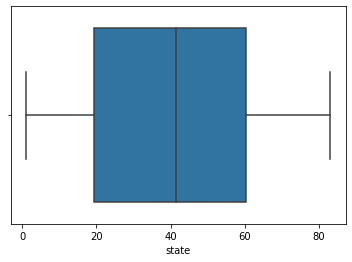

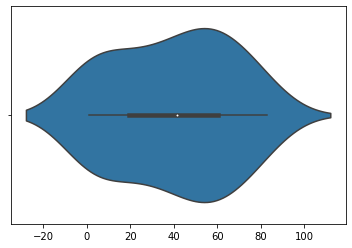

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


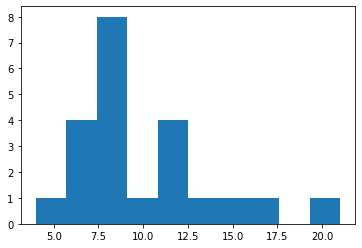

median duration: 9.0
mean duration: 9.863636363636363
-------------------------------------------------------------


TASK   AIClosing-1-1: KI wird das Leben der Menschen verbessern.
State
min: 1
max: 100
median: 73.5
mean: 67.6
std: 28.770470972856874


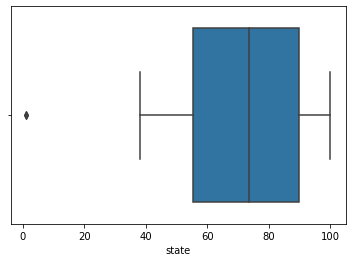

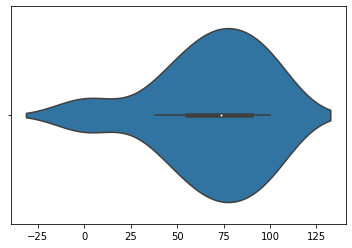

Ausreißer:
                pupilId         taskId state  \
1117  iHYe2TGnR9zgGZ6zh  AIClosing-1-1     1   
1184  5GPMWTgF29JDyeXoG  AIClosing-1-1     1   

                                        question  
1117  KI wird das Leben der Menschen verbessern.  
1184  KI wird das Leben der Menschen verbessern.  

Durations:


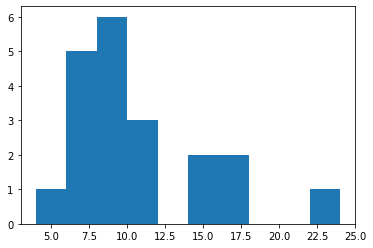

median duration: 8.5
mean duration: 10.25
-------------------------------------------------------------


TASK   AIClosing-1-2: Bei der Entwicklung von KI gibt es Risiken, die bedacht werden müssen
State
min: 55
max: 100
median: 70.5
mean: 75.8
std: 16.49424141935603


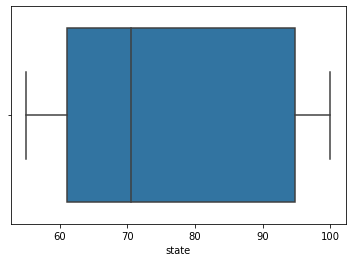

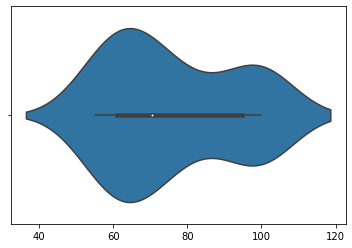

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


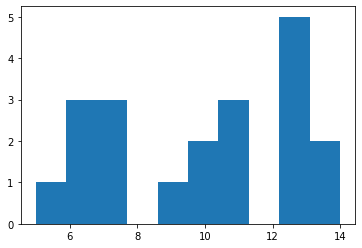

median duration: 10.5
mean duration: 9.95
-------------------------------------------------------------


TASK   AIClosing-1-3: KI birgt eine Gefahr für die Menschheit.
State
min: 21
max: 100
median: 53.5
mean: 53.45
std: 21.666737179372443


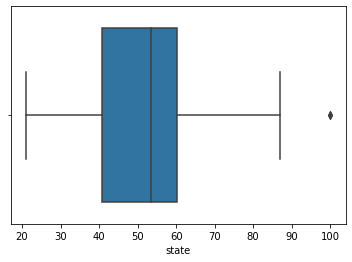

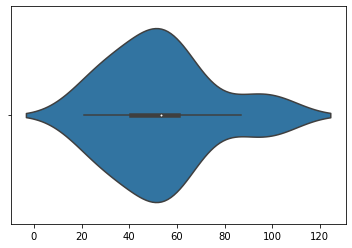

Ausreißer:
                pupilId         taskId state  \
1119  iHYe2TGnR9zgGZ6zh  AIClosing-1-3   100   
1186  5GPMWTgF29JDyeXoG  AIClosing-1-3   100   

                                      question  
1119  KI birgt eine Gefahr für die Menschheit.  
1186  KI birgt eine Gefahr für die Menschheit.  

Durations:


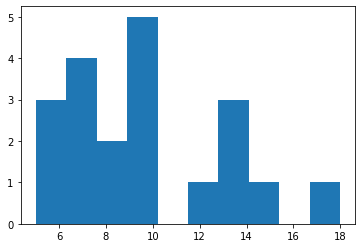

median duration: 9.0
mean duration: 9.65
-------------------------------------------------------------


TASK   AIClosing-1-4: Die Vorteile durch die Entwicklung von KI überwiegen die Risiken.
State
min: 1
max: 100
median: 54.0
mean: 56.75
std: 28.03368509489967


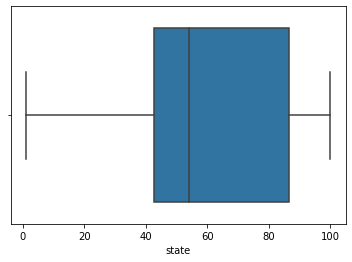

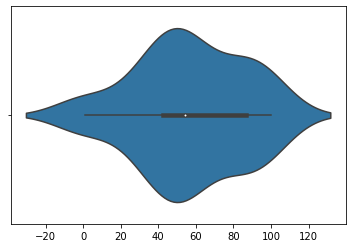

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


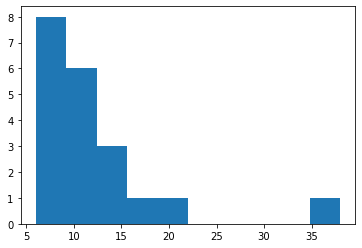

median duration: 11.0
mean duration: 12.25
-------------------------------------------------------------


TASK   AIClosing-1-6: Hattest du Spaß?
State
min: 36
max: 100
median: 69.5
mean: 70.55
std: 19.42543435807807


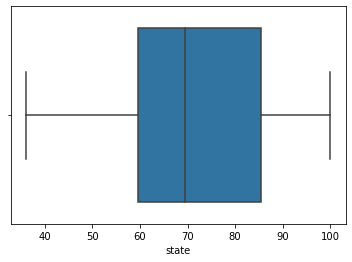

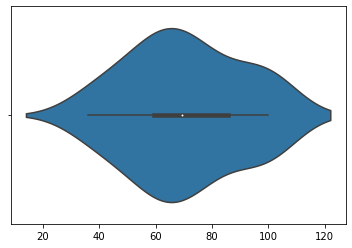

Ausreißer:
Empty DataFrame
Columns: [pupilId, taskId, state, question]
Index: []

Durations:


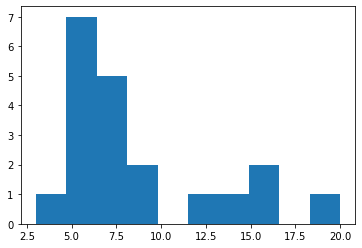

median duration: 7.0
mean duration: 8.6
-------------------------------------------------------------


TASK   AIClosing-1-7: Hast du etwas gelernt?
State
min: 1
max: 100
median: 74.5
mean: 75.55
std: 21.907704124348587


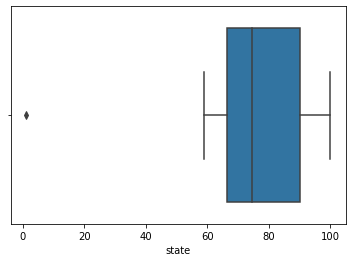

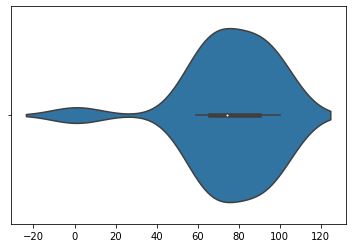

Ausreißer:
                pupilId         taskId state                question
1123  iHYe2TGnR9zgGZ6zh  AIClosing-1-7     1  Hast du etwas gelernt?

Durations:


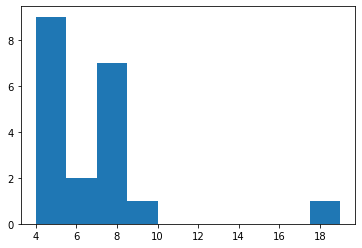

median duration: 6.0
mean duration: 6.8
-------------------------------------------------------------




In [92]:
surveysliders = df[df["subType"]=="surveySlider"]
#surveysliders_by_taskId = df[df["subType"]=="surveySlider"].groupby("taskId")
outlier_tresh = 2

for i in surveysliders["taskId"].unique():
    slider_i = surveysliders[surveysliders["taskId"] == i]
    state_array = [int(entry) for entry in slider_i["state"]]
    duration_array = [int(entry) for entry in slider_i["duration"]]
    print("TASK   " + surveysliders[surveysliders["taskId"] == i]["taskId"].unique()[0] + ": " + surveysliders[surveysliders["taskId"] == i]["question"].unique()[0])
    print("State")
    print("min: " + str(np.min(state_array)))
    print("max: " + str(np.max(state_array)))
    print("median: " + str(np.median(state_array)))
    print("mean: " + str(np.mean(state_array)))
    print("std: " + str(np.std(state_array)))
    ax = sns.boxplot(x=surveysliders[surveysliders["taskId"] == i]["state"])
    plt.show()
    ax1 = sns.violinplot(x=state_array)
    plt.show()
    print("Ausreißer:")
    print(surveysliders[(surveysliders["taskId"]==i) & ((surveysliders["state"]<=np.mean(state_array)-outlier_tresh*np.std(state_array)) | (surveysliders["state"]>=np.mean(state_array)+outlier_tresh*np.std(state_array)))][["pupilId", "taskId", "state", "question"]])
    print("")
    print("Durations:")
    plt.hist(duration_array)
    plt.show()
    print("median duration: " + str(np.median(duration_array)))
    print("mean duration: " + str(np.mean(duration_array)))
    print("-------------------------------------------------------------")
    print("")
    print("")


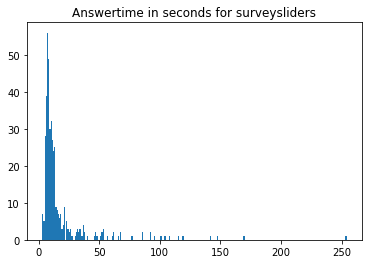

In [93]:
# Antwortzeiten Surveysliders
plt.hist(surveysliders["duration"], bins=np.max(surveysliders["duration"]))
plt.title("Answertime in seconds for surveysliders")
plt.show()



## Inputfields

In [94]:
inputfields = df[df["subType"] == "inputField"]
print(len(inputfields))
inputfields.head()

160


,pupilId,classId,taskId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,...,answers,minLabel,maxLabel,hints,sampleSolution,numberFalseAttempts,number words in answer,rating_content,rating_format,rating_creativity
25,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,113,8,True,inputField,correct,[9],...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,1.0,NaN,NaN,NaN,NaN
26,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,15,7,True,inputField,correct,NaN,...,NaN,NaN,NaN,"Welche Gruppe hat viele Uploads, aber nicht so...",7,0.0,NaN,NaN,NaN,NaN
27,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Classification-2-1-1,Classification-2,74,1,True,inputField,correct,NaN,...,NaN,NaN,NaN,NaN,1,0.0,NaN,NaN,NaN,NaN
28,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Classification-2-1-2,Classification-2,16,1,True,inputField,correct,NaN,...,NaN,NaN,NaN,NaN,1,0.0,NaN,NaN,NaN,NaN
29,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Classification-2-1-3,Classification-2,17,3,True,inputField,correct,NaN,...,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN,NaN,NaN


In [100]:
inputfields.groupby("taskId").count()

,pupilId,classId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,hintsTaken,...,answers,minLabel,maxLabel,hints,sampleSolution,numberFalseAttempts,number words in answer,rating_content,rating_format,rating_creativity
taskId,,,,,,,,,,,,,,,,,,,,,
Classification-2-1-1,22,22,22,22,22,22,22,22,5,0,...,0,0,0,0,22,22,0,0,0,0
Classification-2-1-2,22,22,22,22,22,22,22,22,4,0,...,0,0,0,0,22,22,0,0,0,0
Classification-2-1-3,22,22,22,22,22,22,22,22,5,0,...,0,0,0,0,22,22,0,0,0,0
Classification-2-1-4,22,22,22,22,22,22,22,22,2,0,...,0,0,0,0,22,22,0,0,0,0
Classification-2-1-5,22,22,22,22,22,22,22,22,2,0,...,0,0,0,0,22,22,0,0,0,0
Clustering-1-1-3,25,25,25,25,25,25,25,25,14,16,...,0,0,0,25,25,25,0,0,0,0
Clustering-1-1-4,25,25,25,25,25,25,25,25,9,10,...,0,0,0,25,25,25,0,0,0,0


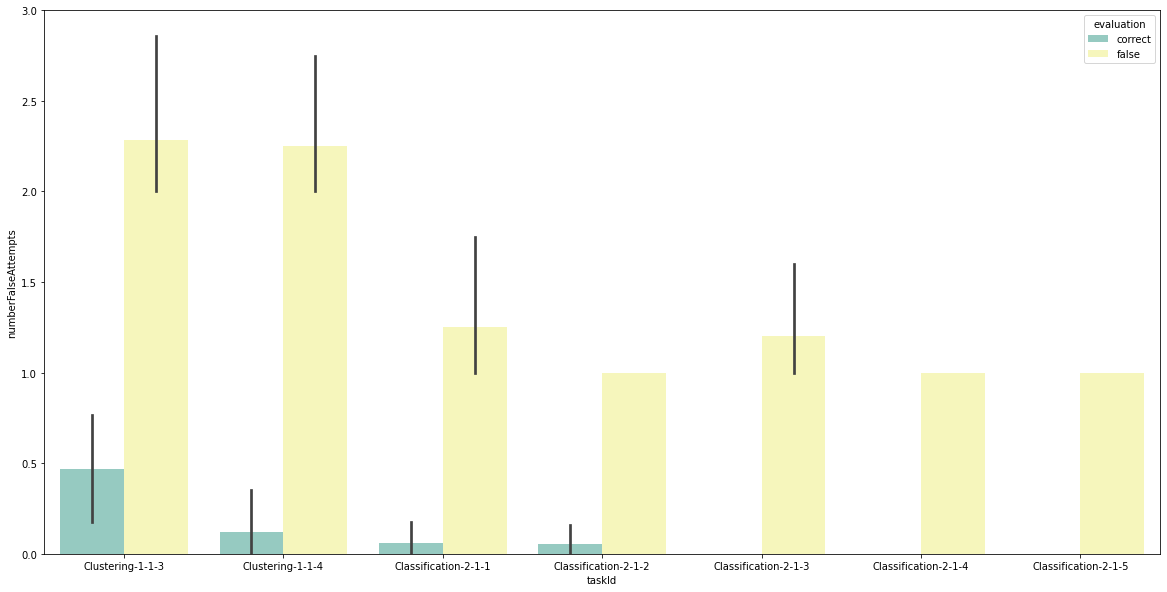

In [95]:
#Die ist egal!
fig = plt.figure(figsize=(20,10))
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
#ax = sns.barplot(x="taskId", y="duration", hue="evaluation", data=inputfields[inputfields["duration"]<250], palette="Set3")
ax = sns.barplot(x="taskId", y="numberFalseAttempts", hue="evaluation", data=inputfields[inputfields["duration"]<250], palette="Set3")

Clustering-1-1-3Wie viele Youtuber sind sowohl sehr aktiv als auch beliebt?
amount of errors: 25
average number of errors: 1.0
average number of errors: 1.0
average number of errors: 1.0583005244258363
percentage errors: 56


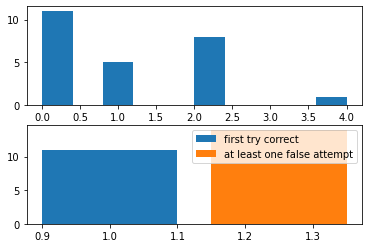

average duration right: 80.91 with std 49.69
average duration false: 89.14 with std 75.53
median duration right: 78.0
median duration false: 67.0
-----------------------------------------------


Clustering-1-1-4Wie viele Youtuber sind aktiv, haben aber nicht so viele Views?
amount of errors: 20
average number of errors: 0.8
average number of errors: 0.0
average number of errors: 1.131370849898476
percentage errors: 36


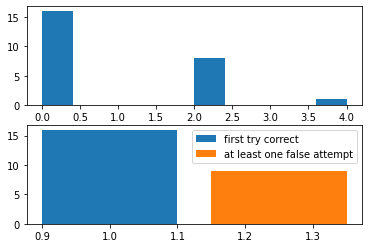

average duration right: 23.12 with std 14.58
average duration false: 34.33 with std 16.86
median duration right: 15.0
median duration false: 35.0
-----------------------------------------------


Classification-2-1-1Wie viele Filme stimmen zwischen Josi und Alex überein? Gib die Zahl in dieses Feld ein.
amount of errors: 6
average number of errors: 0.2727272727272727
average number of errors: 0.0
average number of errors: 0.5378254348272378
percentage errors: 22


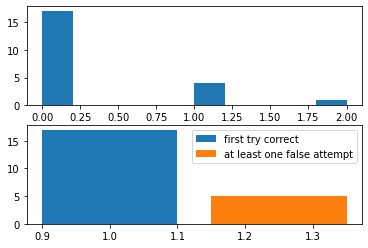

average duration right: 147.24 with std 179.55
average duration false: 32.4 with std 17.48
median duration right: 105.0
median duration false: 33.0
-----------------------------------------------


Classification-2-1-2Wie viele Filme stimmen zwischen Paul und Alex überein?
amount of errors: 4
average number of errors: 0.18181818181818182
average number of errors: 0.0
average number of errors: 0.38569460791993493
percentage errors: 18


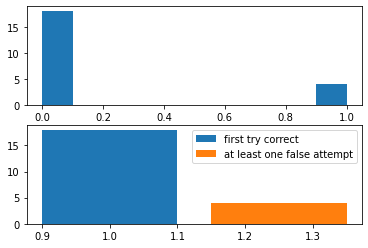

average duration right: 19.83 with std 6.57
average duration false: 19.25 with std 9.36
median duration right: 19.5
median duration false: 17.0
-----------------------------------------------


Classification-2-1-3Wie viele Filme stimmen zwischen Mahmud und Alex überein?
amount of errors: 6
average number of errors: 0.2727272727272727
average number of errors: 0.0
average number of errors: 0.5378254348272378
percentage errors: 22


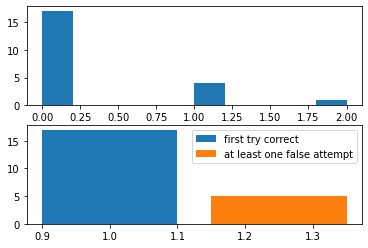

average duration right: 18.71 with std 5.72
average duration false: 16.0 with std 9.88
median duration right: 18.0
median duration false: 10.0
-----------------------------------------------


Classification-2-1-4Wie viele Filme stimmen zwischen Anna und Alex überein?
amount of errors: 2
average number of errors: 0.09090909090909091
average number of errors: 0.0
average number of errors: 0.28747978728803447
percentage errors: 9


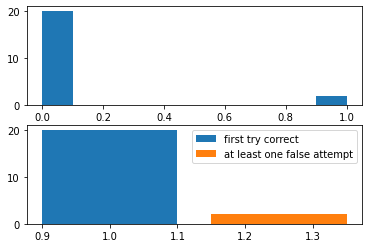

average duration right: 16.85 with std 4.82
average duration false: 12.5 with std 6.5
median duration right: 18.0
median duration false: 12.5
-----------------------------------------------


Classification-2-1-5Wie viele Filme stimmen zwischen Isa und Alex überein?
amount of errors: 2
average number of errors: 0.09090909090909091
average number of errors: 0.0
average number of errors: 0.28747978728803447
percentage errors: 9


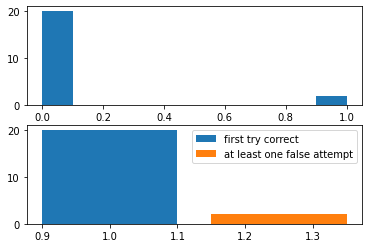

average duration right: 34.4 with std 23.16
average duration false: 7.0 with std 1.0
median duration right: 27.0
median duration false: 7.0
-----------------------------------------------




In [125]:
for taskId in inputfields["taskId"].unique():
    print(str(taskId) + str(inputfields[inputfields["taskId"] == taskId]["question"].unique()[0]))
    taskId_i = inputfields[inputfields["taskId"] == taskId]
    false_attempts = taskId_i["falseAttempts"]
    error_array = []
    abs_number_errors = 0
    number_errors = []
    for entry in false_attempts:
        if type(entry) != np.float:
            abs_number_errors += len(entry)
            number_errors.append(len(entry))
            error_array.append(entry)
        else:
            number_errors.append(0)
    print("amount of errors: " + str(abs_number_errors))
    print("average number of errors: " + str(np.mean(number_errors)))
    print("average number of errors: " + str(np.median(number_errors)))
    print("average number of errors: " + str(np.std(number_errors)))
    print("percentage errors: " + str(int((100/len(false_attempts))*len(error_array))))
    #fig, ax = plt.subplots(21)
    plt.subplot(211)
    plt.hist(number_errors)
    #plt.show()
    #ax.bar(x, height, width, bottom, align)
    #filter(lambda score: score >= 70, scores)
    plt.subplot(212)
    ax2 = plt.bar(1, len(list(filter(lambda number: number == 0, number_errors))), 0.2)
    ax3 = plt.bar(1.25, len(list(filter(lambda number: number > 0, number_errors))), 0.2)
    plt.legend((ax2, ax3), ("first try correct", "at least one false attempt"))
    plt.show()
    duration_false_attempts = []
    duration_correct_attempts = []
    for i, entry in taskId_i.iterrows():
        if type(entry["falseAttempts"]) != np.float:
            duration_false_attempts.append(entry["duration"])
        else:
            duration_correct_attempts.append(entry["duration"])
    print("average duration right: " + str(round(np.mean(duration_correct_attempts), 2)) + " with std " + str(round(np.std(duration_correct_attempts), 2)))
    print("average duration false: " + str(round(np.mean(duration_false_attempts), 2))+ " with std " + str(round(np.std(duration_false_attempts), 2)))
    print("median duration right: " + str(np.median(duration_correct_attempts)))
    print("median duration false: " + str(np.median(duration_false_attempts)))
    print("-----------------------------------------------")
    print("\n")
    

In [21]:
if_false_attempt_df = inputfields.dropna(subset=['falseAttempts'])
if_right_attempts = inputfields[np.where(inputfields["falseAttempts"]!=inputfields["falseAttempts"], True, False)]
if_false_attempt_df.head()

,pupilId,classId,taskId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,...,question,answers,minLabel,maxLabel,hints,sampleSolution,number words in answer,rating_content,rating_format,rating_creativity
25,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,113,8,True,inputField,correct,[9],...,Wie viele Youtuber sind sowohl sehr aktiv als ...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,NaN,NaN,NaN,NaN
92,sqBXKssFvS8pFYAMv,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,61,8,True,inputField,correct,"[3, 3]",...,Wie viele Youtuber sind sowohl sehr aktiv als ...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,NaN,NaN,NaN,NaN
303,FhFN5eiQduwiYKWEn,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,176,8,True,inputField,correct,[9],...,Wie viele Youtuber sind sowohl sehr aktiv als ...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,NaN,NaN,NaN,NaN
304,FhFN5eiQduwiYKWEn,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,70,7,True,inputField,false,"[9, 8]",...,"Wie viele Youtuber sind aktiv, haben aber nich...",NaN,NaN,NaN,"Welche Gruppe hat viele Uploads, aber nicht so...",7,NaN,NaN,NaN,NaN
405,hn2oJ5p2CwPfG44wx,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,142,8,True,inputField,correct,[3],...,Wie viele Youtuber sind sowohl sehr aktiv als ...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,NaN,NaN,NaN,NaN


In [22]:
#different students made sth wrong
if_false_attempt_df["pupilId"].value_counts()

5GPMWTgF29JDyeXoG    6
gooproPtWeTH6dtcB    6
Yss4MmFBusuAqSMaN    3
gDspq39jnffCNv8E2    3
Qmv6K9aQsAEKfHsK9    3
eSpxJKMm99HohczFv    2
jRT6yzZ2ip5ab5ZFM    2
iHYe2TGnR9zgGZ6zh    2
FhFN5eiQduwiYKWEn    2
C2BW6tdii778v4RfL    2
DK2rx5xPL6KCEobJE    2
R8CkqGDeQXZmHxTuk    1
bniRycMi5bwrXjvGy    1
dotjrftFetJme4iPH    1
aiaYpPdYWJKb2hs7J    1
kdqG4fXAK64zdrqN8    1
j3AkifkKRR3t3NeoT    1
sqBXKssFvS8pFYAMv    1
hn2oJ5p2CwPfG44wx    1
Name: pupilId, dtype: int64

In [97]:
print("revisions: " + str(len(if_false_attempt_df[if_false_attempt_df["evaluation"] == "false"])))
print("false attempt, aber noch richtig gemacht: " + str(len(if_false_attempt_df[if_false_attempt_df["evaluation"] == "correct"])))

revisions: 32
false attempt, aber noch richtig gemacht: 9


In [98]:
if_false_attempt_df[if_false_attempt_df["evaluation"] == "false"]

,pupilId,classId,taskId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,...,question,answers,minLabel,maxLabel,hints,sampleSolution,number words in answer,rating_content,rating_format,rating_creativity
304,FhFN5eiQduwiYKWEn,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,70,7,True,inputField,false,"[9, 8]",...,"Wie viele Youtuber sind aktiv, haben aber nich...",NaN,NaN,NaN,"Welche Gruppe hat viele Uploads, aber nicht so...",7,NaN,NaN,NaN,NaN
547,kdqG4fXAK64zdrqN8,qFEyvypMn4sAwLwtc,Classification-2-1-3,Classification-2,27,3,True,inputField,false,[2],...,Wie viele Filme stimmen zwischen Mahmud und Al...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
654,aiaYpPdYWJKb2hs7J,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,44,8,True,inputField,false,"[6, 6]",...,Wie viele Youtuber sind sowohl sehr aktiv als ...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,NaN,NaN,NaN,NaN
692,C2BW6tdii778v4RfL,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,45,8,True,inputField,false,"[3, 2]",...,Wie viele Youtuber sind sowohl sehr aktiv als ...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,NaN,NaN,NaN,NaN
693,C2BW6tdii778v4RfL,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,22,7,True,inputField,false,"[8, 6]",...,"Wie viele Youtuber sind aktiv, haben aber nich...",NaN,NaN,NaN,"Welche Gruppe hat viele Uploads, aber nicht so...",7,NaN,NaN,NaN,NaN
862,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,15,8,True,inputField,false,"[, ]",...,Wie viele Youtuber sind sowohl sehr aktiv als ...,NaN,NaN,NaN,In welchem Cluster sind die beliebtesten und a...,8,NaN,NaN,NaN,NaN
863,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,11,7,True,inputField,false,"[, 3]",...,"Wie viele Youtuber sind aktiv, haben aber nich...",NaN,NaN,NaN,"Welche Gruppe hat viele Uploads, aber nicht so...",7,NaN,NaN,NaN,NaN
864,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Classification-2-1-1,Classification-2,39,1,True,inputField,false,[4],...,Wie viele Filme stimmen zwischen Josi und Alex...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
865,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Classification-2-1-2,Classification-2,14,1,True,inputField,false,[3],...,Wie viele Filme stimmen zwischen Paul und Alex...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
867,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Classification-2-1-4,Classification-2,19,1,True,inputField,false,[0],...,Wie viele Filme stimmen zwischen Anna und Alex...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


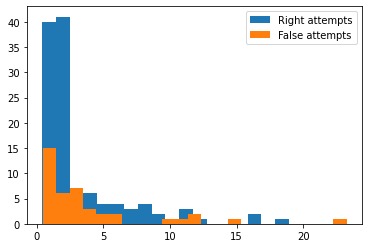

In [99]:
# Duration difference between correct and false attempts
fig, ax1 = plt.subplots()
ax1.hist(if_right_attempts[if_right_attempts["duration"]<400]["duration"]/12, bins=int(np.max(if_right_attempts[if_right_attempts["duration"]<400]["duration"])/12), label='Right attempts')
ax1.hist(if_false_attempt_df["duration"]/12, bins=int(np.max(if_false_attempt_df["duration"])/12), label='False attempts')
ax1.legend()

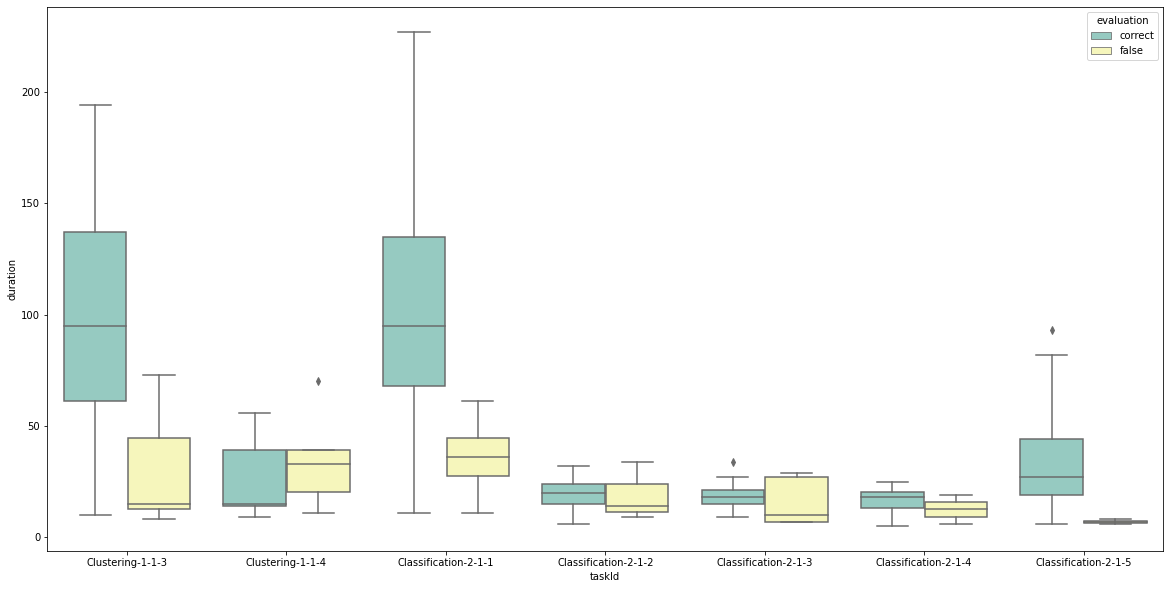

In [75]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="taskId", y="duration", hue="evaluation", data=inputfields[inputfields["duration"]<250], palette="Set3")

## MC
### Barplot

['Gesichtserkennung nutzt KI', 'Die Personalisierung einer Google-Anfrage nutzt KI', 'Der Newsfeed eines Social Network nutzt KI', 'Die Startseite einer Webseite, die jedem Besucher die gleichen Inhalte anzeigt nutzt KI']


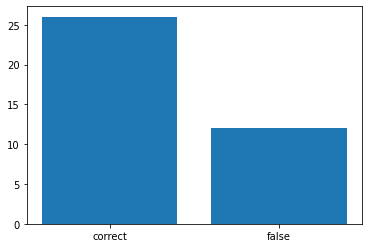

['Die Anwendung, die den Facebook-Feed erstellt, kann auch Schach spielen', 'Das Programm zur Gesichtserkennung auf deinem Handy kann auch Auto fahren', 'Eine Sprachsteuerung wie Siri oder Alexa kann auch Gesichter erkennen']


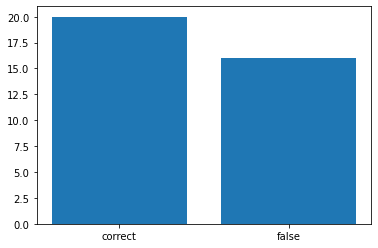

['Empfehlungssysteme gehören zur spezifischen KI', 'Eine KI aus einem Film, die eigenständige Entscheidungen trifft, mit Menschen spricht und sich am Ende gegen sie wendet, gehört zur allgemeinen KI', 'Programme zur Bilderkennung gehören zur allgemeinen KI']


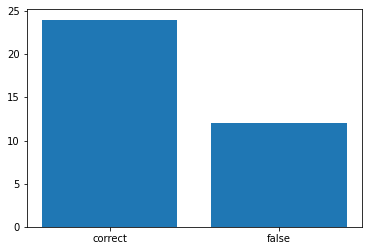

['Eine KI, die sich in einem einzigen Bereich so intelligent verhält wie ein Mensch, muss allgemeine Intelligenz besitzen', 'KI-Anwendungen sind allgemein intelligent', 'KI-Anwendungen zeigen intelligentes Verhalten in einem kleinen Bereich', 'Intelligentes Verhalten in einem spezifischen Bereich muss nicht gleich allgemeine Intelligenz bedeuten']


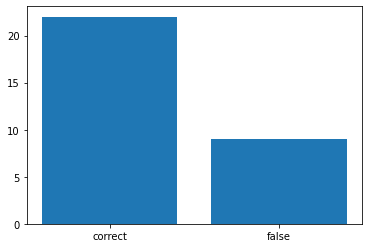

['KI-Anwendungen treffen eigenständige Entscheidungen', 'Eine KI, die in allen Bereichen so schlau ist wie ein Mensch, gibt es noch nicht', 'Spezifische KI umfasst Anwendungen, die menschenähnliche Intelligenz in einem kleinen Bereich zeigen', 'Heutige KI-Anwendungen gehören alle zur spezifischen KI', 'Ein Spam-Filter ist eine allgemeinen KI', 'KI-Anwendungen lernen durch Erfahrung', 'Intelligentes Verhalten setzt allgemeine Intelligenz voraus']


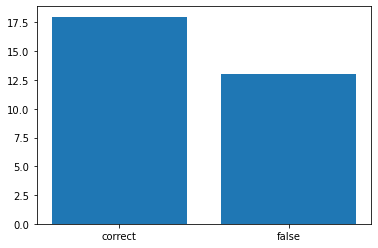

['Die Daten, die wir für das Training benutzen, heißen Trainingsdaten', 'Für das Training nutzen wir Daten ohne Label', 'Unser Ziel ist es, einen Algorithmus zu trainieren, der für neue Bilder das richtige Label vorhersagen kann. Also zu sagen, ob ein Bild einen Hund oder eine Katze zeigt', 'Nach dem Training testen wir nochmal auf ein paar neuen Daten, wie gut die Vorhersagen des Algorithmus sind']


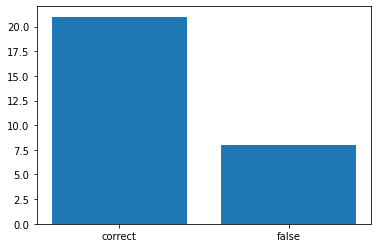

['Das überwachte und das unüberwachte Lernen unterscheiden sich zum Beispiel daran, dass wir einmal Daten mit und einmal Daten ohne Label nutzen', 'Maschinelles Lernen ist ein Teilbereich der KI', 'Das maschinelle Lernen beschäftigt sich mit Programmen, die selbständig in großen Datenmengen Gesetzmäßigkeiten erkennen können', 'Beim unüberwachten Lernen wollen wir lernen, für neue Daten das richtige Label vorherzusagen']


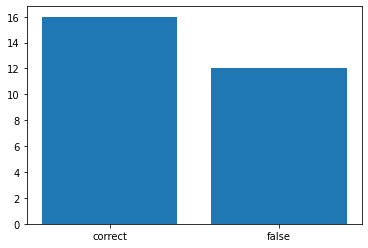

['Unüberwachtes Lernen', 'Überwachtes Lernen']


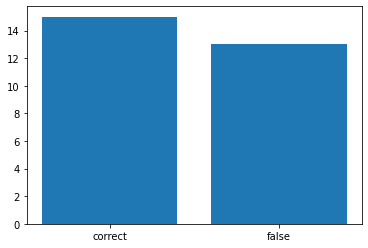

['Unüberwachtes Lernen', 'Überwachtes Lernen']


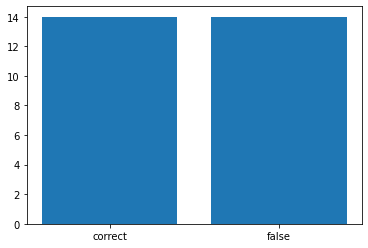

['Unüberwachtes Lernen', 'Überwachtes Lernen']


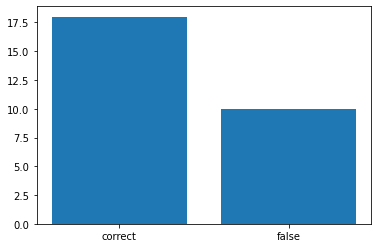

['Beim überwachten Lernen versucht man Struktur in Daten zu finden', 'Beim überwachten Lernen braucht man Daten ohne Label', 'Einen Algorithmus zu trainieren, der Bildern mit Hunden das Label “Hund” gibt, wäre ein Fall für überwachtes Lernen']


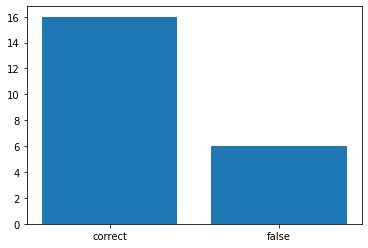

['Beim unüberwachten Lernen nutzt man Daten mit Label', 'Beim unüberwachten Lernen hat man keine Label für die Daten', 'Beim unüberwachten Lernen geht es darum, Struktur in den Daten zu finden', 'Beim unüberwachten Lernen wollen wir die richtigen Label für neue Daten vorhersagen']


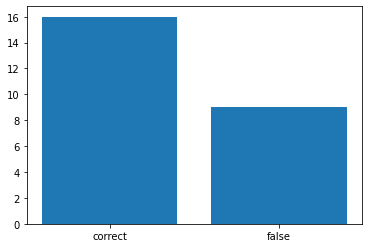

['Die Youtuber im roten Cluster laden öfter Videos hoch', 'Die Youtuber im blauen Cluster laden öfter Videos hoch']


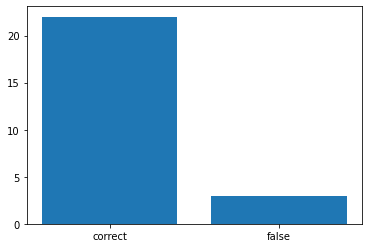

['Mahmud', 'Isa', 'Josi', 'Anna', 'Paul']


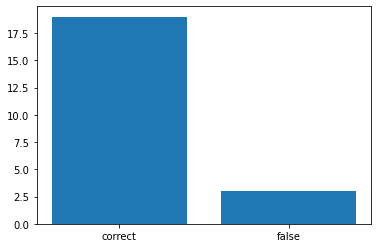

['Fluch der Karibik', 'James Bond', 'Avengers Endgame', 'Hangover', 'Herr der Ringe']


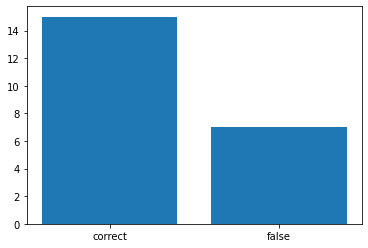

['Ein Algorithmus, der anhand vieler alter Fälle gelernt hat, medizinische Diagnosen zu stellen, gehört zum überwachten Lernen', 'Ein Algorithmus, der dir basierend auf deinen Lieblingsfächern einen Beruf vorschlägt, könnte man mittels überwachtem Lernen umsetzen', 'Ein Algorithmus, der ähnliche Berufe gruppiert, gehört zum überwachten Lernen']


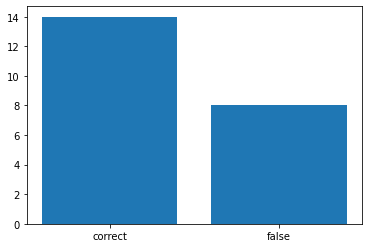

['Der Algorithmus würde immer noch alle Hunderassen als Hunde erkennen, weil es keine Katzen sind', 'Bei Hunden anderer Rassen ist es schwer zu sagen, ob er sie erkennen würde, aber sehr wahrscheinlich nicht so zuverlässig', 'Der Algorithmus würde nur Hunde dieser Rasse zuverlässig als Hunde erkennen']


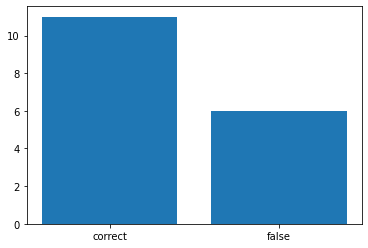

['Eine spezifische KI zeigt intelligentes Verhalten in einem kleinen Bereich', 'Jeder Mensch wird zukünftig eine Vielzahl verschiedener KIs in seinem Alltag nutzen', 'Eine fertige KI-Anwendung kann nicht mit Erfahrung lernen, sie bleibt, wie sie ist', 'Eine fertige KI-Anwendung kann nicht ohne Hilfe von einem Menschen funktionieren', 'KI kann irgendwann alles besser als der Mensch', 'Jede KI hat allgemeine Intelligenz. Damit ist jede KI eine allgemeine KI', 'Derzeit gibt es sowohl Anwendungen, die zur spezifischen, als auch welche, die zur allgemeinen KI gehören', 'KI-Anwendungen zeichnen sich dadurch aus, dass sie intelligentes Verhalten zeigen, autonom funktionieren und mit Erfahrung lernen', 'Ein Programm, dass so gut Schach spielen kann, wie Menschen, ist ein Beispiel für eine spezifische KI']


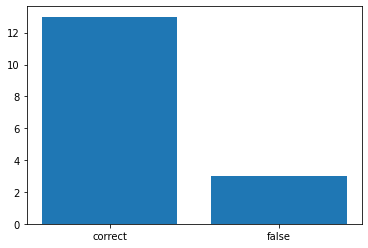

['Die Erkennung von Gegenständen auf Bildern', 'Das Sortieren von Bildern nach Datum', 'Ein personalisiertes Empfehlungssystem für Musik', 'Eine Nachrichtenseite, die jedem Nutzer den gleichen Inhalt präsentiert']


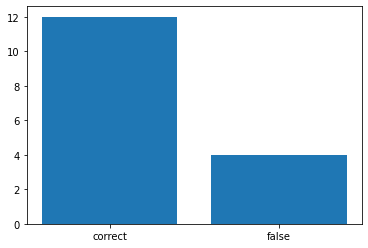

['Clustering ist ein Beispiel für unüberwachtes Lernen', 'Wenn wir für Daten Label vorhersagen wollen, betreiben wir Clustering', 'Algorithmen des maschinellen Lernens können aus vorhandenen Daten selbständig lernen', 'Algorithmen des maschinellen Lernens benötigen oft große Mengen an Daten, damit sie gute Ergebnisse erzielen', 'Algorithmen des maschinellen Lernens lernen nur, was in den Daten vorhanden ist. Daher ist die Auswahl an Trainingsdaten sehr wichtig', 'Beim überwachten Lernen nutzen wir Daten ohne Label', 'Wenn wir für Daten Label vorhersagen wollen, betreiben wir überwachtes Lernen', 'Beim unüberwachten Lernen versuchen wir, Strukturen in den Daten zu entdecken']


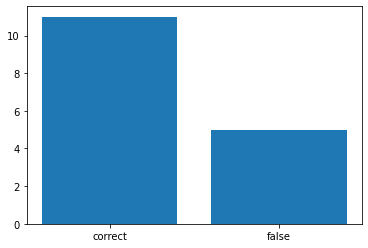

['Eine Webseite, die für neue Rezepte vorhersagt, ob sie dir “gefallen” oder “nicht gefallen”, ist eine Aufgabe für das überwachte Lernen', 'Eine Webseite, die ähnliche Rezepte gruppiert, wäre eine Aufgabe für das Clustering']


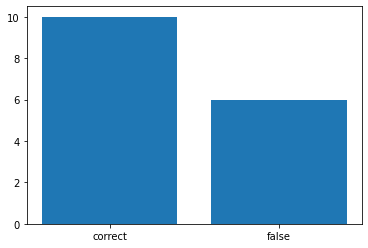

['Die Trainingsdaten, mit denen der Algorithmus gelernt hat, enthielten keine oder kaum Bilder von dunkelhäutigen Menschen', 'Der Algorithmus wurde falsch programmiert']


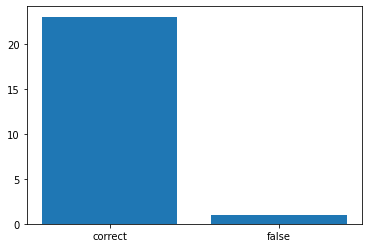

['LKW- und Taxifahrer', 'Lehrer', 'Pflegepersonal', 'Angestellte im Kundenservice', 'Angestellte bei einer Bank oder Versicherung', 'Wissenschaftler']


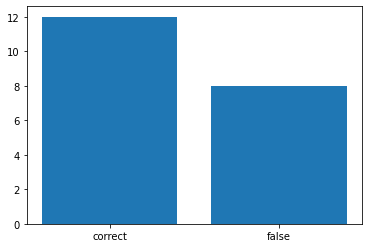

['KI kann helfen, die Behandlungen besser an jeden einzelnen Patienten anzupassen', 'KI-Methoden werden Ärzte komplett ersetzen', 'KI kann die Erkennung von Tumoren auf Scans verbessern', 'KI kann die medizinische Versorgung günstiger machen', 'KI kann helfen, die richtigen Behandlungen zu empfehlen', 'KI-Methoden können immer die richtige Diagnose stellen', 'KI kann helfen, bessere Diagnosen zu stellen']


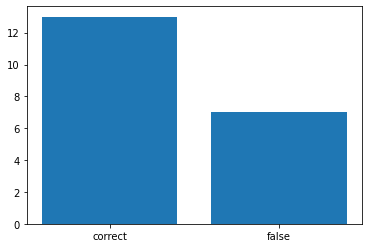

In [38]:
multipleChoice = df[df["subType"]=="multipleChoice"]

for i in multipleChoice["taskId"].unique():
    answers = []
    for answer in multipleChoice[multipleChoice["taskId"] == i]["answers"]:
        for answeritem in answer:
            #print(answeritem)
            answers.append(answeritem["de"])
    print(list(set(answers)))
    #sns.barplot(x="day", y="total_bill", data=tips)
    #sns.barplot(data=np.array(multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts()))
    plt.bar(["correct", "false"], np.array(multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts()))
    plt.show()

### True False Rations

In [20]:
for i in multipleChoice["taskId"].unique():
    if("correct" in multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys() and "false" in multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys()):
        print(multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts()["correct"]/multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts()["false"])
    elif("correct" in multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys() and not "false" in multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys()):
        print(multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys())
    elif("correct" not in multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys() and "false" in multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys()):
        print(multipleChoice[multipleChoice["taskId"] == i]["evaluation"].value_counts().keys())

2.1666666666666665
1.25
2.0
2.4444444444444446
0.7222222222222222
2.625
1.3333333333333333
1.1538461538461537
1.0
1.8
2.6666666666666665
1.7777777777777777
7.333333333333333
6.333333333333333
2.142857142857143
1.75
1.8333333333333333
0.23076923076923078
3.0
0.45454545454545453
1.6666666666666667
23.0
1.5
0.5384615384615384


## Freitext

In [10]:
freetext = df[df["subType"]=="freetext"]
#freetext["state"]=freetext["state"].str.replace("<p>","")
#freetext["state"]=freetext["state"].str.replace("</p>","")

print(str(len(freetext)) + " freetext tasks have been submitted")
freetext.head()

268 freetext tasks have been submitted


,pupilId,classId,taskId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,...,question,answers,minLabel,maxLabel,hints,sampleSolution,number words in answer,rating_content,rating_format,rating_creativity
1,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,AI-1-v2,119,"Künstliche Intelligenz ist ein Algorithmus, de...",True,freetext,correct,NaN,...,Was ist deiner Meinung nach Künstliche Intelli...,NaN,NaN,NaN,NaN,Die Schülerinnen und Schüler (SuS) sollen besc...,18.0,3.0,5.0,4.0
8,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-4-v2-1-3,AI-4-v2,285,"Eine KI ist ein Algorithmus, der auf eine best...",True,freetext,correct,NaN,...,Jetzt weißt du schon mehr über KI. Sag nochmal...,NaN,NaN,NaN,NaN,KI-Anwendungen zeichnen sich aus durch intelli...,58.0,5.0,5.0,5.0
11,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,ML-1-1-1,ML-1,203,"Einem Algorithmus, der Hunde auf Bildern erken...",True,freetext,correct,NaN,...,"Kannst du einen Algorithmus schreiben, der Hun...",NaN,NaN,NaN,NaN,Die SuS sollen sinnvolle Wenn-Dann-Regeln find...,58.0,4.0,5.0,4.0
16,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,ML-2-1-2,ML-2,219,Beim maschinellen Lernen wird der Algorithmus ...,True,freetext,correct,NaN,...,Weißt du vielleicht schon etwas über das masch...,NaN,NaN,NaN,NaN,"Das ist nur eine Abfrage, um über das Vorwisse...",59.0,4.0,5.0,4.0
35,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Clustering-2-1-1,Clustering-2,509,Für eine Make-Up-Marke würde ich am ehesten de...,True,freetext,correct,NaN,...,Schau dir die Mittelpunkte der Cluster genau a...,NaN,NaN,NaN,NaN,Make-Up: Cluster 1 repräsentiert es am besten....,58.0,5.0,4.0,4.0


### Länge der Abgaben

median length of freetext antwort: 20.5
mean length of freetext antwort: 27.813432835820894
std of length of freetext antwort: 23.631078673230604
50% are between 9.0 and 44.25 words long
min number of words: 1.0
max number of words: 119.0
Das sind nur die Längen der akzeptierten Antworten


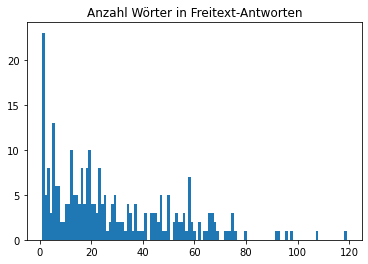

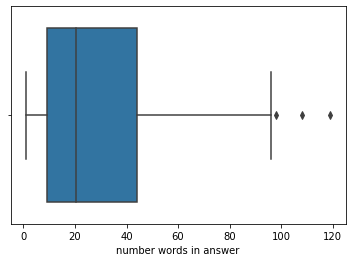

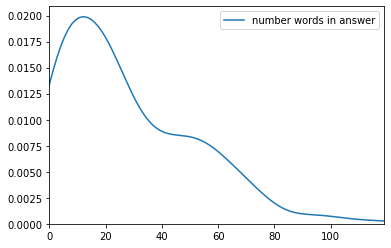

In [27]:
print("median length of freetext antwort: " + str(np.median(freetext["number words in answer"])))
print("mean length of freetext antwort: " + str(np.mean(freetext["number words in answer"])))
print("std of length of freetext antwort: " + str(np.std(freetext["number words in answer"])))

q75, q25 = np.percentile(freetext["number words in answer"], [75 ,25])
print("50% are between " + str(q25) + " and " + str(q75) + " words long")

print("min number of words: " + str(np.min(freetext["number words in answer"])))
print("max number of words: " + str(np.max(freetext["number words in answer"])))
print("Das sind nur die Längen der akzeptierten Antworten")

plt.hist(freetext["number words in answer"], bins=int(np.max(list(freetext["number words in answer"]))))
plt.title("Anzahl Wörter in Freitext-Antworten")
plt.show()

sns.boxplot(freetext["number words in answer"])
plt.show()

kde_length = sns.kdeplot(freetext["number words in answer"])
kde_length.set_xlim(left=0, right=np.max(freetext["number words in answer"]))
#kde_length.set_ylim(bottom=0, top=200);
plt.show()

### Kurze Antworten, die noch akzeptiert wurden

In [12]:
#was sind die kurzen antworten, die akzeptiert wurden?
freetext[(freetext["number words in answer"]<5) & (freetext["taskId"] != "AIClosing-1-8") & (freetext["taskId"] != "ML-2-1-2")& (freetext["taskId"] != "AI-1-v2-1-2")][["pupilId", "classId", "taskId", "state", "question"]]

,pupilId,classId,taskId,state,question
885,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Impact-2-1-1,das Gesicht ist unscharf,Was für Probleme könnten durch den Einsatz von...
1066,iHYe2TGnR9zgGZ6zh,GkQSJvPTRWsLnpyR9,AI-4-v2-1-3,ja<br>,Jetzt weißt du schon mehr über KI. Sag nochmal...
1069,iHYe2TGnR9zgGZ6zh,GkQSJvPTRWsLnpyR9,ML-1-1-1,nö<br>,"Kannst du einen Algorithmus schreiben, der Hun..."
1093,iHYe2TGnR9zgGZ6zh,GkQSJvPTRWsLnpyR9,Clustering-2-1-1,.,Schau dir die Mittelpunkte der Cluster genau a...
1133,5GPMWTgF29JDyeXoG,GkQSJvPTRWsLnpyR9,AI-4-v2-1-3,.,Jetzt weißt du schon mehr über KI. Sag nochmal...
1136,5GPMWTgF29JDyeXoG,GkQSJvPTRWsLnpyR9,ML-1-1-1,.,"Kannst du einen Algorithmus schreiben, der Hun..."
1160,5GPMWTgF29JDyeXoG,GkQSJvPTRWsLnpyR9,Clustering-2-1-1,.,Schau dir die Mittelpunkte der Cluster genau a...
1162,5GPMWTgF29JDyeXoG,GkQSJvPTRWsLnpyR9,LimitsML-1-2,.,"Was würde passieren, wenn wir alle Bilder von ..."
1169,5GPMWTgF29JDyeXoG,GkQSJvPTRWsLnpyR9,EvalML-1-7,.,"Beschreib noch einmal in eigenen Worten, was m..."
1173,5GPMWTgF29JDyeXoG,GkQSJvPTRWsLnpyR9,Impact-2-1-1,fehler,Was für Probleme könnten durch den Einsatz von...


Erst noch die Antworten auf Fragen rausnehmen, zu denen SuS noch nichts wissen müssen.
Scheinen wenige SuS zu sein, von denen die Antworten trotzdem akzeptiert wurden.

vllt musste ein account hochgespielt werden

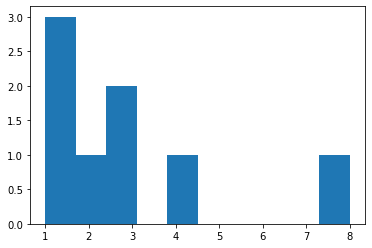

In [28]:
freetext[(freetext["number words in answer"]<5) & (freetext["taskId"] != "AIClosing-1-8")& (freetext["taskId"] != "ML-2-1-2")& (freetext["taskId"] != "AI-1-v2-1-2")]["pupilId"].value_counts()

plt.hist(freetext[(freetext["number words in answer"]<5) & (freetext["taskId"] != "AIClosing-1-8")& (freetext["taskId"] != "ML-2-1-2")& (freetext["taskId"] != "AI-1-v2-1-2")]["pupilId"].value_counts())
plt.show()

In [14]:
# kleiner als IQR25
freetext[(freetext["number words in answer"]<9) & (freetext["taskId"] != "AIClosing-1-8")& (freetext["taskId"] != "ML-2-1-2")& (freetext["taskId"] != "AI-1-v2-1-2")][["pupilId", "classId", "taskId", "state", "question"]]

,pupilId,classId,taskId,state,question
508,TLqNCrX4jaYixjtv7,qFEyvypMn4sAwLwtc,LimitsML-1-2,Dann erkennt der Algorithmus Seehunde als Hunde.,"Was würde passieren, wenn wir alle Bilder von ..."
760,3hiSwDCiw9HeyHg7f,qFEyvypMn4sAwLwtc,Impact-3-1-3,Es können Fehler von Menschenverhindert werden.,In vielen Bereichen wird der Mensch auch nicht...
818,jRT6yzZ2ip5ab5ZFM,qFEyvypMn4sAwLwtc,Impact-2-1-1,Man könnte damit verbrechen fälschen,Was für Probleme könnten durch den Einsatz von...
872,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Clustering-2-1-1,"<span style=""color: rgb(51, 51, 51);"">⠀</span>",Schau dir die Mittelpunkte der Cluster genau a...
874,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,LimitsML-1-2,"<span style=""color: rgb(51, 51, 51);"">⠀</span>","Was würde passieren, wenn wir alle Bilder von ..."
881,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,EvalML-1-7,"<span style=""color: rgb(51, 51, 51);"">⠀</span>...","Beschreib noch einmal in eigenen Worten, was m..."
885,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Impact-2-1-1,das Gesicht ist unscharf,Was für Probleme könnten durch den Einsatz von...
894,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,Impact-3-1-3,sicher werden die Kooperation mit Ki vorteile ...,In vielen Bereichen wird der Mensch auch nicht...
900,gooproPtWeTH6dtcB,qFEyvypMn4sAwLwtc,AIClosing-1-5,"<span style=""color: rgb(51, 51, 51);"">⠀</span>","Du siehst also, dass die Erwartungen der Mensc..."
1066,iHYe2TGnR9zgGZ6zh,GkQSJvPTRWsLnpyR9,AI-4-v2-1-3,ja<br>,Jetzt weißt du schon mehr über KI. Sag nochmal...


In [29]:
freetext[(freetext["number words in answer"]<9) & (freetext["taskId"] != "AIClosing-1-8")& (freetext["taskId"] != "ML-2-1-2")& (freetext["taskId"] != "AI-1-v2-1-2")]["pupilId"].value_counts()

5GPMWTgF29JDyeXoG    8
gooproPtWeTH6dtcB    6
Yss4MmFBusuAqSMaN    6
Qmv6K9aQsAEKfHsK9    6
iHYe2TGnR9zgGZ6zh    5
gDspq39jnffCNv8E2    4
3hiSwDCiw9HeyHg7f    1
TLqNCrX4jaYixjtv7    1
eSpxJKMm99HohczFv    1
jRT6yzZ2ip5ab5ZFM    1
DK2rx5xPL6KCEobJE    1
Name: pupilId, dtype: int64

In [30]:
# gibt es noch pending antworten?
freetext[(freetext["evaluation"] == "pending")]

,pupilId,classId,taskId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,...,question,answers,minLabel,maxLabel,hints,sampleSolution,number words in answer,rating_content,rating_format,rating_creativity
175,6bBwnX2mwAp2NAwNR,qFEyvypMn4sAwLwtc,Clustering-2-1-1,Clustering-2,845,Das 1. Cluster repräsentiert am Besten eine Ma...,True,freetext,pending,NaN,...,Schau dir die Mittelpunkte der Cluster genau a...,NaN,NaN,NaN,NaN,Make-Up: Cluster 1 repräsentiert es am besten....,96.0,NaN,NaN,NaN
376,Ay6mfswm3SFcQdNJg,qFEyvypMn4sAwLwtc,AIClosing-1-5,AIClosing,223,Die Bedenken die solche Personen äußern sind n...,True,freetext,pending,NaN,...,"Du siehst also, dass die Erwartungen der Mensc...",NaN,NaN,NaN,NaN,"Hier können die SuS nochmal alles, was sie übe...",48.0,NaN,NaN,NaN
379,Ay6mfswm3SFcQdNJg,qFEyvypMn4sAwLwtc,AIClosing-1-8,AIClosing,243,Ich fand das Design und die Idee dieser Plattf...,True,freetext,pending,NaN,...,Wir wollen diesen Kurs natürlich noch verbesse...,NaN,NaN,NaN,NaN,Die SuS können hier noch etwas loswerden. Ist ...,66.0,NaN,NaN,NaN
470,dotjrftFetJme4iPH,qFEyvypMn4sAwLwtc,Clustering-2-1-1,Clustering-2,1154,Die Clusternummer 1 wäre für die Make-Up-Marke...,True,freetext,pending,NaN,...,Schau dir die Mittelpunkte der Cluster genau a...,NaN,NaN,NaN,NaN,Make-Up: Cluster 1 repräsentiert es am besten....,76.0,NaN,NaN,NaN
604,MRSj5LqwWj6WSoj4E,qFEyvypMn4sAwLwtc,ML-2-1-2,ML-2,445,Das maschinelles Lernen ist ein Begriff für da...,True,freetext,pending,NaN,...,Weißt du vielleicht schon etwas über das masch...,NaN,NaN,NaN,NaN,"Das ist nur eine Abfrage, um über das Vorwisse...",28.0,NaN,NaN,NaN
702,C2BW6tdii778v4RfL,qFEyvypMn4sAwLwtc,Clustering-2-1-1,Clustering-2,189,"Cluster 1 repräsentiert eine Make-Up-Marke, da...",True,freetext,pending,NaN,...,Schau dir die Mittelpunkte der Cluster genau a...,NaN,NaN,NaN,NaN,Make-Up: Cluster 1 repräsentiert es am besten....,38.0,NaN,NaN,NaN
951,R8CkqGDeQXZmHxTuk,qFEyvypMn4sAwLwtc,Clustering-2-1-1,Clustering-2,200,"Ich denke die nummer 1, weil mehr mädchen benu...",True,freetext,pending,NaN,...,Schau dir die Mittelpunkte der Cluster genau a...,NaN,NaN,NaN,NaN,Make-Up: Cluster 1 repräsentiert es am besten....,35.0,NaN,NaN,NaN
978,j3AkifkKRR3t3NeoT,qFEyvypMn4sAwLwtc,Clustering-2-1-1,Clustering-2,406,"Ich denke, dass Cluster 1 am ehesten eine Make...",True,freetext,pending,NaN,...,Schau dir die Mittelpunkte der Cluster genau a...,NaN,NaN,NaN,NaN,Make-Up: Cluster 1 repräsentiert es am besten....,64.0,NaN,NaN,NaN


### Welche Antworten wurden nicht akzeptiert?

In [17]:
# evaluation kann sein: correct, pending, false
freetext[(freetext["evaluation"] == "false")]

# 7 abgaben, die nur einen punkt enthalten (2 davon wieder zu ML-2-1-2, also eig egal!).
# Bei einer Abgabe wurde der Text von Wikipedia kopiert
# eine war ein kurzer Satz
# Abgaben von 4 SuS
# Die Lehrer haben dabei nur an einer Stelle feedback gegeben!

'''
Lehrer geben nur wenig zurück! Und benutzen auch selten Feedback, oder?
'''

'\nLehrer geben nur wenig zurück! Und benutzen auch selten Feedback, oder?\n'

### Wurden Antworten mehrfach zurück gegeben?

In [18]:
for i, task in freetext[freetext["evaluation"] == "false"].iterrows():
    print(len(task["falseAttempts"]))

1
1
1
1
1
1
1
1
1


### Teacher Feedback

In [31]:
freetext["teacherFeedback"].value_counts()

                                                                                                                              255
Achte auf die Rechtschreibung bzw. Groß und Kleinschreibung. Inhaltlich könnte noch mehr kommen!                                1
Inhaltlich gut, etwas genauer antworten. Mustererkennung ist hier ein wichtiges Aufgabenbeispiel oder maschinelles Lernen.      1
K.I. ist erstmal ein Programm, das in einem Computer angewandt wird, damit dieser beispielsweise Muster erkennt.                1
Tolle Antwort!                                                                                                                  1
Wikipedia kopiert!                                                                                                              1
Name: teacherFeedback, dtype: int64

Es wurde nur 5 mal Feedback gegeben:
* K.I. ist erstmal ein Programm, das in einem Computer angewandt wird, damit dieser beispielsweise Muster erkennt.
* Tolle Antwort!    
* Wikipedia kopiert!
* Achte auf die Rechtschreibung bzw. Groß und Kleinschreibung. Inhaltlich könnte noch mehr kommen!
* Inhaltlich gut, etwas genauer antworten. Mustererkennung ist hier ein wichtiges Aufgabenbeispiel oder maschinelles Lernen.

### Ratings

In [32]:
print("content")
print(freetext["rating_content"].value_counts())
print("format")
print(freetext["rating_format"].value_counts())
print("creativity")
print(freetext["rating_creativity"].value_counts())

content
5.0    164
4.0     55
3.0     24
0.0      7
1.0      5
2.0      5
Name: rating_content, dtype: int64
format
5.0    184
4.0     29
3.0     18
2.0     15
0.0      8
1.0      6
Name: rating_format, dtype: int64
creativity
5.0    128
4.0     94
3.0     22
0.0      9
1.0      5
2.0      2
Name: rating_creativity, dtype: int64


IQR75 Content Rating: 5.0
Median Content Rating: 5.0
IQR25 Content Rating: 4.0
Mean Content Rating: 4.334615384615384
Std Content Rating: 1.1366084190365908

IQR75 format Rating: 5.0
Median format Rating: 5.0
IQR25 format Rating: 4.0
Mean format Rating: 4.3307692307692305
Std format Rating: 1.2642325829010392

IQR75 creativity Rating: 5.0
Median creativity Rating: 4.0
IQR25 creativity Rating: 4.0
Mean creativity Rating: 4.196153846153846
Std creativity Rating: 1.1384810289391913



/Users/jean-philipp/Documents/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jean-philipp/Documents/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


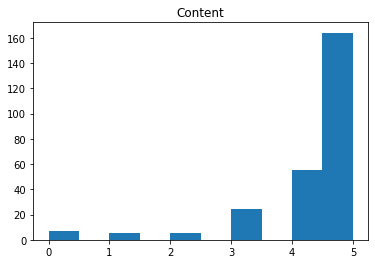

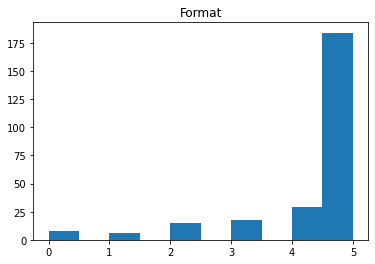

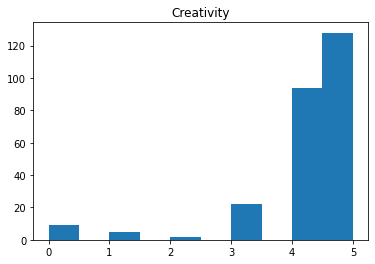

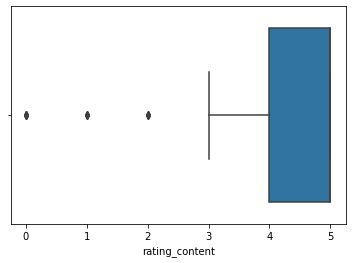

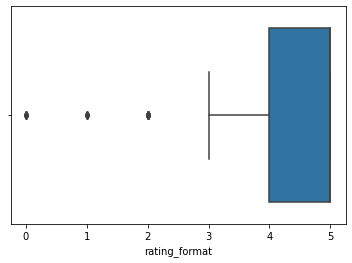

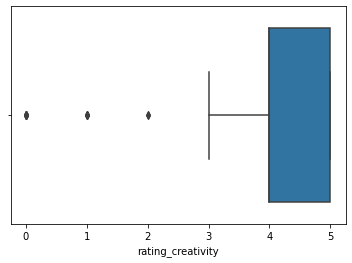

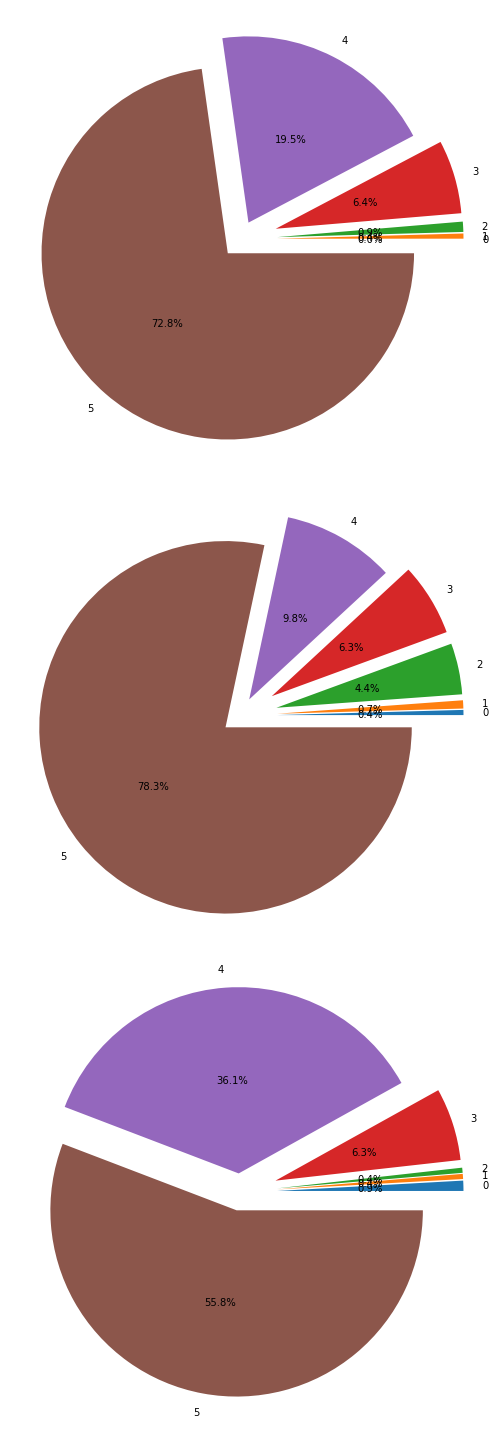

In [33]:
print("IQR75 Content Rating: " + str(np.percentile(freetext[freetext["evaluation"] != "pending"]["rating_content"], 75)))
print("Median Content Rating: " + str(np.nanmedian(freetext["rating_content"])))
print("IQR25 Content Rating: " + str(np.percentile(freetext[freetext["evaluation"] != "pending"]["rating_content"], 25)))
print("Mean Content Rating: " + str(np.mean(freetext["rating_content"])))
print("Std Content Rating: " + str(np.std(freetext["rating_content"])))
print("")

print("IQR75 format Rating: " + str(np.percentile(freetext[freetext["evaluation"] != "pending"]["rating_format"], 75)))
print("Median format Rating: " + str(np.nanmedian(freetext["rating_format"])))
print("IQR25 format Rating: " + str(np.percentile(freetext[freetext["evaluation"] != "pending"]["rating_format"], 25)))
print("Mean format Rating: " + str(np.mean(freetext["rating_format"])))
print("Std format Rating: " + str(np.std(freetext["rating_format"])))
print("")

print("IQR75 creativity Rating: " + str(np.percentile(freetext[freetext["evaluation"] != "pending"]["rating_creativity"], 75)))
print("Median creativity Rating: " + str(np.nanmedian(freetext["rating_creativity"])))
print("IQR25 creativity Rating: " + str(np.percentile(freetext[freetext["evaluation"] != "pending"]["rating_creativity"], 25)))
print("Mean creativity Rating: " + str(np.mean(freetext["rating_creativity"])))
print("Std creativity Rating: " + str(np.std(freetext["rating_creativity"])))
print("")
# TODO: der median muss hier noch falsch sein, der ist 4.0, obwohl es 5 sind


plt.hist(freetext["rating_content"])
plt.title("Content")
plt.show()
plt.hist(freetext["rating_format"])
plt.title("Format")
plt.show()
plt.hist(freetext["rating_creativity"])
plt.title("Creativity")
plt.show()


#boxplots bringen eig nichts!
sns.boxplot(freetext[freetext["evaluation"] != "pending"]["rating_content"])
plt.show()
sns.boxplot(freetext[freetext["evaluation"] != "pending"]["rating_format"])
plt.show()
sns.boxplot(freetext[freetext["evaluation"] != "pending"]["rating_creativity"])
plt.show()


# Pie charts
content_data = freetext[freetext["evaluation"] != "pending"].groupby("rating_content")["rating_content"].sum()
format_data = freetext[freetext["evaluation"] != "pending"].groupby("rating_format")["rating_content"].sum()
creativity_data = freetext[freetext["evaluation"] != "pending"].groupby("rating_creativity")["rating_content"].sum()
labels = ["0", "1", "2", "3", "4", "5"]
#content_labels = freetext[freetext["evaluation"] != "pending"]["rating_content"].unique()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[10,20])

ax1.pie(x=content_data, autopct="%.1f%%", explode = (0.2, 0.2, 0.2, 0.2, 0.1, 0.1), labels=labels, pctdistance=0.5)
ax2.pie(x=format_data, autopct="%.1f%%", explode = (0.2, 0.2, 0.2, 0.2, 0.1, 0.1), labels=labels, pctdistance=0.5)
ax3.pie(x=creativity_data, autopct="%.1f%%", explode = (0.2, 0.2, 0.2, 0.2, 0.1, 0.1), labels=labels, pctdistance=0.5)
plt.tight_layout()
plt.show()

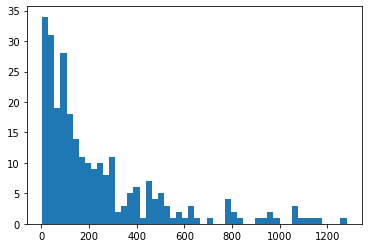

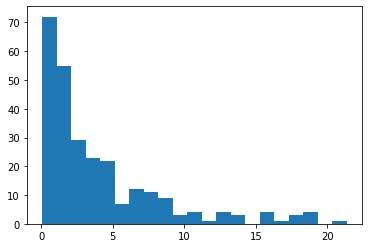

In [34]:
# durations
plt.hist(freetext["duration"], bins=50)
plt.show()

plt.hist(freetext["duration"]/60, bins=int(np.max(freetext["duration"])/60))
plt.show()

In [35]:
# Welche Antworten haben besonders lange gebraucht?
freetext[freetext["duration"] > 700][["pupilId", "classId", "taskId", "duration", "state", "number words in answer"]]

,pupilId,classId,taskId,duration,state,number words in answer
135,Kd6FuRsrq6QvPrkKp,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,979,"Künstliche Intelligenz heißt, dass ein Roboter...",55.0
141,6bBwnX2mwAp2NAwNR,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,968,"Künstliche Intelligenz bedeutet, dass ein Robo...",58.0
148,6bBwnX2mwAp2NAwNR,qFEyvypMn4sAwLwtc,AI-4-v2-1-3,932,KI (Künstliche Intelligenz) unterscheidet man ...,108.0
175,6bBwnX2mwAp2NAwNR,qFEyvypMn4sAwLwtc,Clustering-2-1-1,845,Das 1. Cluster repräsentiert am Besten eine Ma...,96.0
381,hn2oJ5p2CwPfG44wx,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,818,Bei Künstlichen Intelligenzen wird durch das D...,34.0
396,hn2oJ5p2CwPfG44wx,qFEyvypMn4sAwLwtc,ML-2-1-2,786,"Maschinelles Lernen wird auch ""deep learning"" ...",60.0
415,hn2oJ5p2CwPfG44wx,qFEyvypMn4sAwLwtc,Clustering-2-1-1,770,"Das Beauty, Vlogs repräsentiert am ehesten ein...",75.0
436,dotjrftFetJme4iPH,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,1063,"Meiner Meinung nach, künstliche Intelligenz is...",34.0
470,dotjrftFetJme4iPH,qFEyvypMn4sAwLwtc,Clustering-2-1-1,1154,Die Clusternummer 1 wäre für die Make-Up-Marke...,76.0
472,TLqNCrX4jaYixjtv7,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,1125,Künstliche Intelligenz ist wenn Programme durc...,66.0


In [36]:
# Bei welchen Aufgaben sind die antworten besonders lang?
freetext[freetext["duration"] > 700]["taskId"].value_counts()

AI-1-v2-1-2         9
AI-4-v2-1-3         4
ML-1-1-1            3
Clustering-2-1-1    3
ML-2-1-2            1
Name: taskId, dtype: int64

In [37]:
# sind das die schüler, die dann auch nciht weit gekommen sind?
slow_freetext_pupils = freetext[freetext["duration"] > 700]["pupilId"].unique()

In [38]:
#for pupilId in freetext[freetext["duration"] > 700]["pupilId"].unique():
#    print(pupil_performance_df[pupil_performance_df["pupilId"] == pupilId])

pupil_performance_df[pupil_performance_df["pupilId"].isin(slow_freetext_pupils)]

'''
manche nicht weit gekommen
die anderen sind eher langsame arbeiter, glaube ich
'''


'\nmanche nicht weit gekommen\ndie anderen sind eher langsame arbeiter, glaube ich\n'

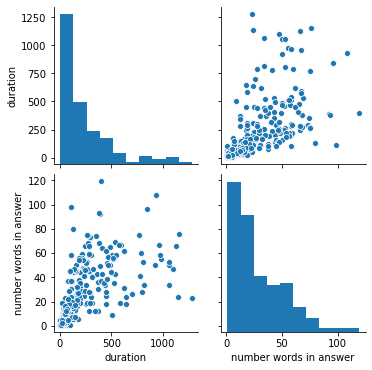

In [39]:
sns.pairplot(freetext[["duration", 'number words in answer']])

In [127]:
# correlation mit kategorischen daten für ["duration", 'number words in answer', "rating_content", 'rating_format', 'rating_creativity']
rho1, p1 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['duration'], freetext[freetext["evaluation"] != "pending"]['rating_content'])
rho2, p2 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['duration'], freetext[freetext["evaluation"] != "pending"]['rating_format'])
rho3, p3 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['duration'], freetext[freetext["evaluation"] != "pending"]['rating_creativity'])
rho4, p4 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['number words in answer'], freetext[freetext["evaluation"] != "pending"]['rating_content'])
rho5, p5 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['number words in answer'], freetext[freetext["evaluation"] != "pending"]['rating_format'])
rho6, p6 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['number words in answer'], freetext[freetext["evaluation"] != "pending"]['rating_creativity'])

print("spearman coeff duration+content: " + str(rho1) + " p-value: " + str(p1))
print("spearman coeff duration+format: " + str(rho2) + " p-value: " + str(p2))
print("spearman coeff duration+creativity: " + str(rho3) + " p-value: " + str(p3))
print("spearman coeff answerlength+content: " + str(rho4) + " p-value: " + str(p4))
print("spearman coeff answerlength+format: " + str(rho5) + " p-value: " + str(p5))
print("spearman coeff answerlength+creativity: " + str(rho6) + " p-value: " + str(p6))

#unter 0.05 ist signifikant
# für coefficients nochmal nachschauen, ab wann wie stark

spearman coeff duration+content: -0.05774405609854682 p-value: 0.3537279037095544
spearman coeff duration+format: 0.07490480132060759 p-value: 0.22871495516461926
spearman coeff duration+creativity: -0.09021440397121602 p-value: 0.14688738819038427
spearman coeff answerlength+content: 0.006235424482870653 p-value: 0.9202969154973344
spearman coeff answerlength+format: 0.10091941779472066 p-value: 0.10446472334223415
spearman coeff answerlength+creativity: -0.07882070157663901 p-value: 0.20522913355889036


In [128]:
rho7, p7 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['rating_content'], freetext[freetext["evaluation"] != "pending"]['rating_format'])
rho8, p8 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['rating_content'], freetext[freetext["evaluation"] != "pending"]['rating_creativity'])
rho9, p9 = scipy.stats.spearmanr(freetext[freetext["evaluation"] != "pending"]['rating_format'], freetext[freetext["evaluation"] != "pending"]['rating_creativity'])

print("spearman coeff content+format: " + str(rho7) + " p-value: " + str(p7))
print("spearman coeff content+creat: " + str(rho8) + " p-value: " + str(p8))
print("spearman coeff format+creat: " + str(rho9) + " p-value: " + str(p9))

spearman coeff content+format: 0.6898912018686403 p-value: 4.5102844236676357e-38
spearman coeff content+creat: 0.6847138328329063 p-value: 2.5890141237812365e-37
spearman coeff format+creat: 0.5501659435236037 p-value: 5.675264570471399e-22


In [131]:
freetext[["duration", 'number words in answer', "rating_content", 'rating_format', 'rating_creativity']].corr()

,number words in answer,rating_content,rating_format,rating_creativity
number words in answer,1.000000,0.145638,0.186290,0.115849
rating_content,0.145638,1.000000,0.790204,0.808266
rating_format,0.186290,0.790204,1.000000,0.740557
rating_creativity,0.115849,0.808266,0.740557,1.000000


<AxesSubplot:>

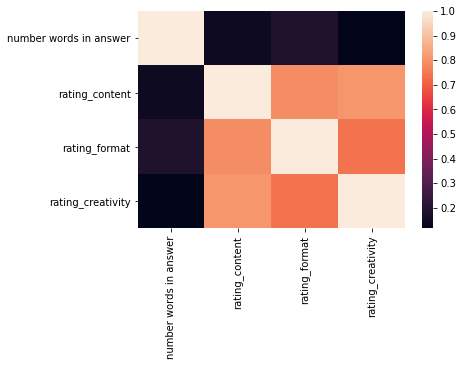

In [132]:
sns.heatmap(freetext[["duration", 'number words in answer', "rating_content", 'rating_format', 'rating_creativity']].corr())

# Chat

In [94]:
chat_df["sentBy"].value_counts()

auto                 266
sWm4d454H7CgZk7xP     26
eFfWFEEHYrGie6TWY     15
vPkj9gw4uYahqDz2b      2
GHpnNu3Yss7Qz8Tm4      1
FZTuuyvpvJBGhnCgk      1
wxkuvgoD5tbZyvyFy      1
Name: sentBy, dtype: int64

In [97]:
# Wie nutzen Lehrer der Chat?
chat_df[chat_df["sentBy"] != "auto"]["message"]
# Hier sind auch noch unsere Nachrichten drinne, glaube ich?! Und lehrer nachrichten!

0      Hier könnt ihr euch individuell aber auch mir ...
12     Hier könnt ihr euch individuell aber auch mir ...
24     Hier könnt ihr euch individuell aber auch mir ...
26     Hier könnt ihr euch individuell aber auch mir ...
31     Hier könnt ihr euch individuell aber auch mir ...
43     Hier könnt ihr euch individuell aber auch mir ...
48                                                    HI
49     Hier könnt ihr euch individuell aber auch mir ...
50                                             ok, danke
55     Hier könnt ihr euch individuell aber auch mir ...
65     Hier könnt ihr euch individuell aber auch mir ...
74     Hier könnt ihr euch individuell aber auch mir ...
79     Hier könnt ihr euch individuell aber auch mir ...
87     Hier könnt ihr euch individuell aber auch mir ...
96     Hier könnt ihr euch individuell aber auch mir ...
99     Hier könnt ihr euch individuell aber auch mir ...
101    Hier könnt ihr euch individuell aber auch mir ...
105    Hier könnt ihr euch indi

In [101]:
# Nutzen SuS den Chat?
chat_df[np.where(chat_df["sentBy"].isin(set(df["pupilId"])), True, False)]


,0,sentBy,message,request


## Hilfeanfragen

## Durations
### nach Aufgabentyp

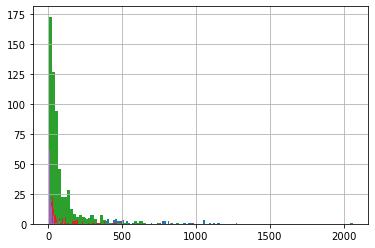

In [104]:
df.groupby("subType")["duration"].hist(bins=100)
plt.show()
# TODO: vllt als 3d histogram? https://matplotlib.org/stable/gallery/mplot3d/hist3d.html

#for subType in df.groupby("subType"):
    #print(subType["duration"])
    #subType["duration"].hist()
    #plt.show()
    
#groupby("taskId")
#groupby("pupilId")